# 1.Import Packages

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np

# Visuals
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns


# 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

#
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report


# Timeseries 
import statsmodels.api as sm

# GeoMap
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from geopy.exc import GeocoderTimedOut

# 2.Data Gathering


Dataset: https://www1.nyc.gov/site/finance/taxes/property-annualized-sales-update.page

In [ ]:
def merge(df_manhattan_init, df_queens_init, df_bronx_init, df_brooklyn_init, df_statenisland_init):
  # merge all datasets
  result = df_manhattan_init.append(df_queens_init).append(df_bronx_init).append(df_brooklyn_init).append(df_statenisland_init)
  return result

In [ ]:
def import_2021_datasets():
  df_2021_manhattan_init = pd.read_excel('/content/gdrive/MyDrive/ColabNotebooks/NYC/data/2021_rollingsales_manhattan.xlsx')
  df_2021_queens_init = pd.read_excel('/content/gdrive/MyDrive/ColabNotebooks/NYC/data/2021_rollingsales_queens.xlsx')
  df_2021_bronx_init = pd.read_excel('/content/gdrive/MyDrive/ColabNotebooks/NYC/data/2021_rollingsales_bronx.xlsx')
  df_2021_brooklyn_init = pd.read_excel('/content/gdrive/MyDrive/ColabNotebooks/NYC/data/2021_rollingsales_brooklyn.xlsx')
  df_2021_statenisland_init = pd.read_excel('/content/gdrive/MyDrive/ColabNotebooks/NYC/data/2021_rollingsales_statenisland.xlsx')

  df_2021 = merge(df_2021_manhattan_init, df_2021_queens_init, df_2021_bronx_init, df_2021_brooklyn_init, df_2021_statenisland_init)

  return df_2021

In [ ]:
def import_2020_datasets():
  df_2020_manhattan_init = pd.read_excel('/content/gdrive/MyDrive/ColabNotebooks/NYC/data/2020_rollingsales_manhattan.xlsx')
  df_2020_queens_init = pd.read_excel('/content/gdrive/MyDrive/ColabNotebooks/NYC/data/2020_rollingsales_queens.xlsx')
  df_2020_bronx_init = pd.read_excel('/content/gdrive/MyDrive/ColabNotebooks/NYC/data/2020_rollingsales_bronx.xlsx')
  df_2020_brooklyn_init = pd.read_excel('/content/gdrive/MyDrive/ColabNotebooks/NYC/data/2020_rollingsales_brooklyn.xlsx')
  df_2020_statenisland_init = pd.read_excel('/content/gdrive/MyDrive/ColabNotebooks/NYC/data/2020_rollingsales_statenisland.xlsx')

  df_2020 = merge(df_2020_manhattan_init, df_2020_queens_init, df_2020_bronx_init, df_2020_brooklyn_init, df_2020_statenisland_init)

  return  df_2020

In [ ]:
def import_2019_datasets():
  df_2019_manhattan_init = pd.read_excel('/content/gdrive/MyDrive/ColabNotebooks/NYC/data/2019_rollingsales_manhattan.xlsx')
  df_2019_queens_init = pd.read_excel('/content/gdrive/MyDrive/ColabNotebooks/NYC/data/2019_rollingsales_queens.xlsx')
  df_2019_bronx_init = pd.read_excel('/content/gdrive/MyDrive/ColabNotebooks/NYC/data/2019_rollingsales_bronx.xlsx')
  df_2019_brooklyn_init = pd.read_excel('/content/gdrive/MyDrive/ColabNotebooks/NYC/data/2019_rollingsales_brooklyn.xlsx')
  df_2019_statenisland_init = pd.read_excel('/content/gdrive/MyDrive/ColabNotebooks/NYC/data/2019_rollingsales_statenisland.xlsx')

  df_2019 = merge(df_2019_manhattan_init, df_2019_queens_init, df_2019_bronx_init, df_2019_brooklyn_init, df_2019_statenisland_init)

  return df_2019

In [ ]:
df_2021 = import_2021_datasets()

In [ ]:
df_2020 = import_2020_datasets()

In [ ]:
df_2019 = import_2019_datasets()

In [ ]:
df = df_2021.append(df_2020).append(df_2019)

# 3.Data Briefing


In [ ]:
print(len(df.columns))
print(df.columns)

22
Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASEMENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE', 'EASE-MENT'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244566 entries, 0 to 8370
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   BOROUGH                         244563 non-null  float64       
 1   NEIGHBORHOOD                    244563 non-null  object        
 2   BUILDING CLASS CATEGORY         244563 non-null  object        
 3   TAX CLASS AT PRESENT            244165 non-null  object        
 4   BLOCK                           244563 non-null  float64       
 5   LOT                             244563 non-null  float64       
 6   EASEMENT                        0 non-null       float64       
 7   BUILDING CLASS AT PRESENT       244165 non-null  object        
 8   ADDRESS                         244562 non-null  object        
 9   APARTMENT NUMBER                56454 non-null   object        
 10  ZIP CODE                        244538 non-null  float64  

In [ ]:
def format_df(df):
  #init 
  df_formatting = df
  
  # Drop EASEMENT and index
  df_formatting = df_formatting.drop('EASEMENT', 1).drop('EASE-MENT', 1)

  # Convert to numeric
  cols_to_numerics = ['BLOCK','LOT','COMMERCIAL UNITS', 'TOTAL UNITS','LAND SQUARE FEET','GROSS SQUARE FEET','SALE PRICE','YEAR BUILT','BOROUGH','ZIP CODE']
  df_formatting[cols_to_numerics] = df_formatting[cols_to_numerics].apply(pd.to_numeric)
  ## 'YEAR BUILT TENS'
  df_formatting['YEAR BUILT TENS'] = df_formatting['YEAR BUILT'] - df_formatting['YEAR BUILT']%10
  
  # Convert to DateTime
  cols_to_dateTime = ['SALE DATE']
  df_formatting[cols_to_dateTime] = df[cols_to_dateTime].apply(pd.to_datetime)

  # Get Month/Year from 'SALE DATE'
  df_formatting['SALE MONTH'] = df_formatting['SALE DATE'].dt.month
  df_formatting['SALE YEAR'] = df_formatting['SALE DATE'].dt.year
  df_formatting['SALE YEAR-MONTH'] = df_formatting['SALE YEAR'].astype(str) + "-" + df_formatting['SALE MONTH'].astype(str)

  # Convert to Categories
  cols_to_categories = ['BUILDING CLASS CATEGORY','TAX CLASS AT TIME OF SALE','BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE']
  df_formatting[cols_to_categories] = df_formatting[cols_to_categories].apply(pd.Categorical)
  
  # Get first character of 'BUILDING CLASS AT TIME OF SALE' - https://www.propertyshark.com/mason/text/nyc_building_class.html
  df_formatting['BUILDING CLASS AT TIME OF SALE CATEGORY'] = df_formatting['BUILDING CLASS AT TIME OF SALE'].astype(str).str[0]

  #### Add-ons
  
  #### #### 1. Get Geolocation of logitute and latitude based on the address we have
  #### #### #### - Obstacle: I tried with the address column but errors such as 5th/ 2nd without 'th' causes error, or even with apt numbers attached on it.

  #### #### 2. Get one more dataframe from Zillow by iterating through the address we have
  #### #### #### - Obstacle: This will be time consuming, but this will give insight of investment of houses as well. (Zestimate)

  ####

  #result
  df_formatted = df_formatting.reset_index(drop=True)

  return df_formatted

In [ ]:
df_formatted = format_df(df)
df_formatted.info()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244566 entries, 0 to 244565
Data columns (total 25 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   BOROUGH                                  244563 non-null  float64       
 1   NEIGHBORHOOD                             244563 non-null  object        
 2   BUILDING CLASS CATEGORY                  244563 non-null  category      
 3   TAX CLASS AT PRESENT                     244165 non-null  object        
 4   BLOCK                                    244563 non-null  float64       
 5   LOT                                      244563 non-null  float64       
 6   BUILDING CLASS AT PRESENT                244165 non-null  category      
 7   ADDRESS                                  244562 non-null  object        
 8   APARTMENT NUMBER                         56454 non-null   object        
 9   ZIP CODE                  

In [ ]:
pd.set_option("display.max_rows", None)

print(df_formatted[['BUILDING CLASS CATEGORY']].value_counts())
print(df_formatted[['BUILDING CLASS AT TIME OF SALE CATEGORY']].value_counts())
print(df_formatted[['BUILDING CLASS AT TIME OF SALE']].value_counts())

BUILDING CLASS CATEGORY                   
01 ONE FAMILY DWELLINGS                       56160
02 TWO FAMILY DWELLINGS                       46378
10 COOPS - ELEVATOR APARTMENTS                37878
13 CONDOS - ELEVATOR APARTMENTS               36490
03 THREE FAMILY DWELLINGS                     12895
07 RENTALS - WALKUP APARTMENTS                 7985
09 COOPS - WALKUP APARTMENTS                   7885
04 TAX CLASS 1 CONDOS                          4877
15 CONDOS - 2-10 UNIT RESIDENTIAL              4598
44 CONDO PARKING                               3700
17 CONDO COOPS                                 3300
05 TAX CLASS 1 VACANT LAND                     3249
12 CONDOS - WALKUP APARTMENTS                  3118
22 STORE BUILDINGS                             2599
14 RENTALS - 4-10 UNIT                         1604
29 COMMERCIAL GARAGES                          1552
08 RENTALS - ELEVATOR APARTMENTS               1141
21 OFFICE BUILDINGS                            1074
47 CONDO NON-BUSINESS

In [ ]:
for col in df_formatted.columns:
  print('--------------------------')
  print(col)
  print(df_formatted[col].value_counts().size)   
  print(df_formatted[col].value_counts().head(50))
  print('--------------------------')

--------------------------
BOROUGH
5
4.0    75907
3.0    69826
1.0    51910
5.0    24861
2.0    22059
Name: BOROUGH, dtype: int64
--------------------------
--------------------------
NEIGHBORHOOD
255
FLUSHING-NORTH               7370
UPPER EAST SIDE (59-79)      5128
UPPER EAST SIDE (79-96)      4829
UPPER WEST SIDE (59-79)      4661
BEDFORD STUYVESANT           4264
BOROUGH PARK                 3845
BAYSIDE                      3259
MIDTOWN EAST                 3115
ASTORIA                      3084
FOREST HILLS                 2891
UPPER WEST SIDE (79-96)      2788
EAST NEW YORK                2772
LONG ISLAND CITY             2752
JACKSON HEIGHTS              2697
BAY RIDGE                    2553
FLUSHING-SOUTH               2494
FLATBUSH-EAST                2454
MIDTOWN WEST                 2452
SHEEPSHEAD BAY               2447
GREAT KILLS                  2438
RICHMOND HILL                2414
CANARSIE                     2412
ELMHURST                     2392
CROWN HEIGHTS    

# 4.Targetting Data

In [ ]:
df_target = df_formatted

In [ ]:
#Residential areas - #BUILDING CLASS AT SALE those starts with A,B,C,D,R
#Reference - https://www.propertyshark.com/mason/text/nyc_building_class.html
df_target = df_target[df_target['BUILDING CLASS AT TIME OF SALE CATEGORY'].isin(['A','B','C','D','R'])]

#df_target = df_target[df_target['SALE PRICE'] != 0]
  #A $0 sale indicates that there was a transfer of ownership without a cash consideration.
  #There can be a number of reasons for a $0 sale including transfers of ownership from
  #parents to children. 
#df_target = df_target[df_target['SALE PRICE'] != 1]
#df_target = df_target[df_target['SALE PRICE'] != 10]

#SALE PRICE > 1000000 is more like a normal transaction for a residential area
df_target = df_target[df_target['SALE PRICE'] > 100000]
#SALE PRICE < 1000000 is beyond my budget for now 
df_target = df_target[df_target['SALE PRICE'] < 2000000]

#RESIDENTIAL UNITS - This is for me! I don't need units for two yet
df_target = df_target[df_target['RESIDENTIAL UNITS'] < 2]

#GROSS SQUARE FEET - That are 0 or null does not give me information, drop them
df_target = df_target[(df_target['GROSS SQUARE FEET'].notna())]
df_target = df_target[(df_target['GROSS SQUARE FEET']!=0)]

#GROSS SQUARE FEET - That are 0 or null does not give me information, drop them
df_target = df_target[(df_target['YEAR BUILT'].notna())]
df_target = df_target[(df_target['YEAR BUILT']!=0)]

In [ ]:
df_target.describe()

BOROUGH         BLOCK  ...    SALE MONTH     SALE YEAR
count  33901.000000  33901.000000  ...  33901.000000  33901.000000
mean       3.976343   6483.310138  ...      6.663727   2020.034748
std        0.885362   3767.713777  ...      3.461412      0.844574
min        1.000000     13.000000  ...      1.000000   2019.000000
25%        4.000000   3757.000000  ...      4.000000   2019.000000
50%        4.000000   5913.000000  ...      7.000000   2020.000000
75%        5.000000   8811.000000  ...     10.000000   2021.000000
max        5.000000  16323.000000  ...     12.000000   2021.000000

[8 rows x 14 columns]

In [ ]:
print(df_target['SALE PRICE'].mean())
print(df_target['SALE PRICE'].median())
print(df_target['SALE PRICE'].quantile(0.10))
print(df_target['SALE PRICE'].quantile(0.50))
print(df_target['SALE PRICE'].quantile(0.90))


679539.3171882835
624000.0
380000.0
624000.0
999000.0


# 5.Data Visualization


In [ ]:
df_target.head()

BOROUGH  ... BUILDING CLASS AT TIME OF SALE CATEGORY
4821      1.0  ...                                       A
4851      1.0  ...                                       A
5587      1.0  ...                                       A
5591      1.0  ...                                       A
5598      1.0  ...                                       A

[5 rows x 25 columns]

In [ ]:
# test exploration
# df_target = df_target[df_target['BUILDING CLASS CATEGORY']=='13 CONDOS - ELEVATOR APARTMENTS']

## 5.1 2019 - 2021 Sale Price by Monthly

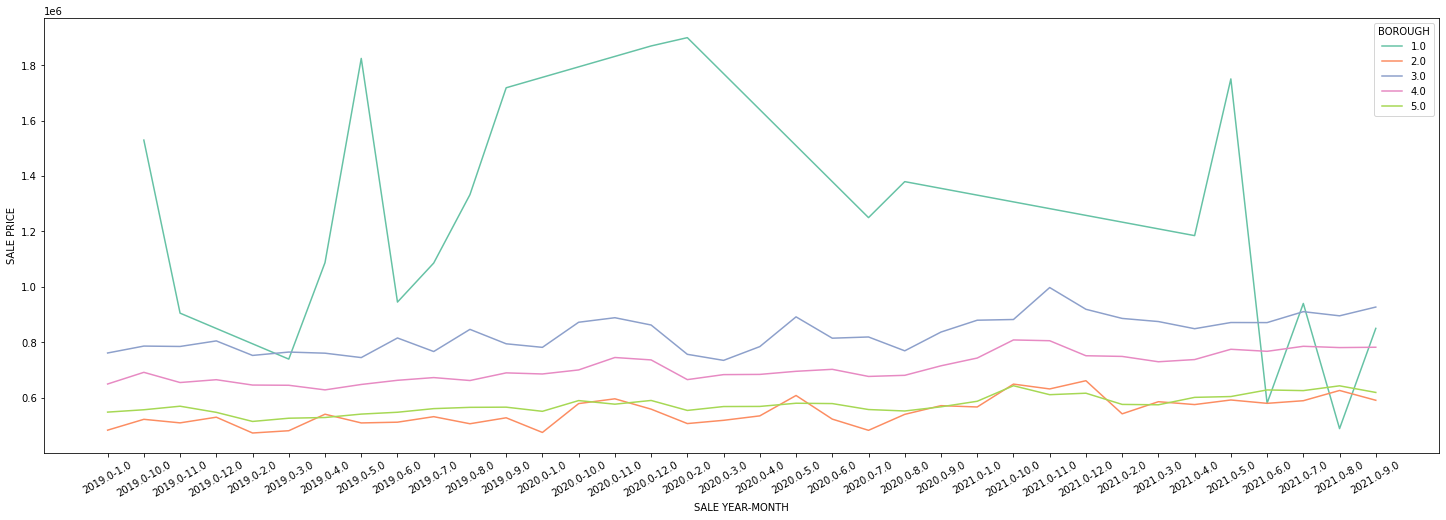

In [ ]:
#sns.boxplot(x='SALE YEAR-MONTH',y='SALE PRICE',data=df_target)
plt.figure(figsize = (25,8))
ax = sns.lineplot(x='SALE YEAR-MONTH',y='SALE PRICE', hue='BOROUGH',data=df_target.sort_values(by="SALE YEAR-MONTH"), ci=None, palette="Set2")
ax.tick_params(axis='x', rotation=30)

In [ ]:
df_calendar = df_target.set_index("SALE DATE")

## 5.2 Year Built Distribution



### 5.3.1 All Data

(1895.0, 2022.0)

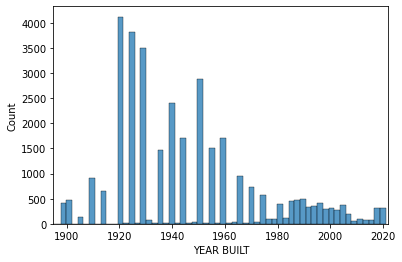

In [ ]:
var = sns.histplot(x='YEAR BUILT', data=df_target)
plt.xlim(1895,2022)

In [ ]:
def histogram_yearbuilt_year_separation():
  g = sns.displot(data= df_target, x='YEAR BUILT',  kde=False, col="SALE YEAR", hue="SALE YEAR", multiple="stack")

  g.fig.set_figwidth(25)
  plt.xlim(1895,2022)
  plt.show()

In [ ]:
def histogram_yearbuilt_year_stacked():
  g = sns.displot(data= df_target, x='YEAR BUILT',  kde=False, hue="SALE YEAR", multiple="stack")
  
  g.fig.set_figwidth(25)
  plt.xlim(1895,2022)
  plt.show()

In [ ]:
def histogram_yearbuilt_year_kde():
  g = sns.displot(data= df_target, x='YEAR BUILT',  kind='kde', hue="SALE YEAR")

  g.fig.set_figwidth(25)
  plt.xlim(1895,2022)
  plt.show()


In [ ]:
def histogram_yearbuilt_year_ecdf():
  g = sns.displot(data= df_target, x='YEAR BUILT',  kind='ecdf', hue="SALE YEAR")
  
  g.fig.set_figwidth(25)
  plt.xlim(1895,2022)
  plt.show()


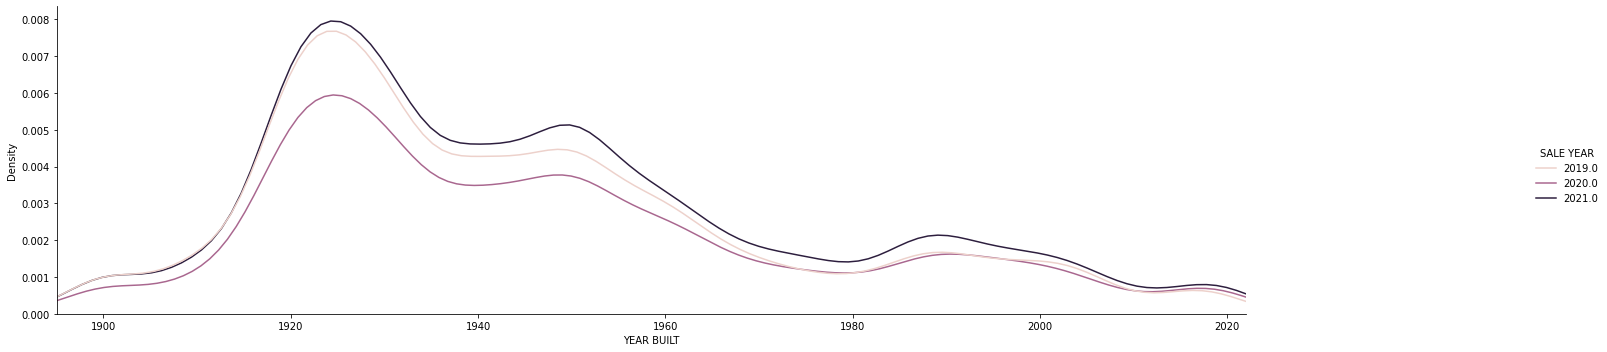

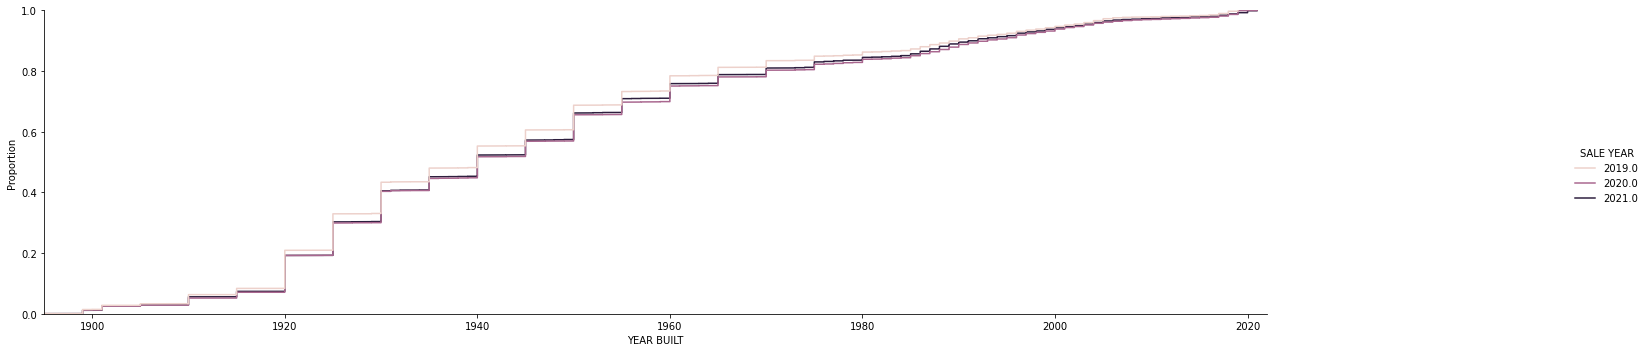

Observation: Throughout 2019 and 2021, the most popular time phrase is 1920 - 1930
                                       the second peak is in 1960s
                                       the third peak is in 2020s
All three years has fairly similar distribution of each years per sold occurances


In [ ]:
def yearbuilt_visualization():
  #histogram_yearbuilt_year_separation() #Although this graph is helpful KDE&ECDF sums up nicely
  #histogram_yearbuilt_year_stacked() #Although this graph is helpful KDE&ECDF sums up nicely
  histogram_yearbuilt_year_kde()
  histogram_yearbuilt_year_ecdf()

yearbuilt_visualization()
print("Observation: Throughout 2019 and 2021, the most popular time phrase is 1920 - 1930")
print("                                       the second peak is in 1960s")
print("                                       the third peak is in 2020s")

print("All three years has fairly similar distribution of each years per sold occurances")

### 5.3.2 Borough and Neighborhood Details


In [ ]:
def histogram_yearbuilt_borough_kde(year, borough, summary = 0):

  neighborhood = df_target["NEIGHBORHOOD"].value_counts().head(50).index.tolist()

  if summary == 1:
    hue = "BOROUGH"
  elif summary == 2:
    hue = "NEIGHBORHOOD"  
  else:
    hue = "SALE YEAR"

  g = sns.displot(data= df_target.query("`SALE YEAR` in @year and `BOROUGH` in @borough and `NEIGHBORHOOD` in @neighborhood"), x='YEAR BUILT',  kind='kde', hue=hue)

  g.fig.set_figwidth(25)
  plt.xlim(1895,2022)
  plt.show()


In [ ]:
def histogram_yearbuilt_borough_ecdf(year, borough, neighborhood, summary = 0):

  neighborhood = df_target["NEIGHBORHOOD"].value_counts().head(50).index.tolist()

  if summary == 1:
    hue = "BOROUGH"
  elif summary == 2:
    hue = "NEIGHBORHOOD"  
  else:
    hue = "SALE YEAR"
    
  g = sns.displot(data= df_target.query("`SALE YEAR` in @year and `BOROUGH` in @borough and `NEIGHBORHOOD` in @neighborhood"), x='YEAR BUILT',  kind='ecdf', hue=hue)
  
  g.fig.set_figwidth(25)
  plt.xlim(1895,2022)
  plt.show()


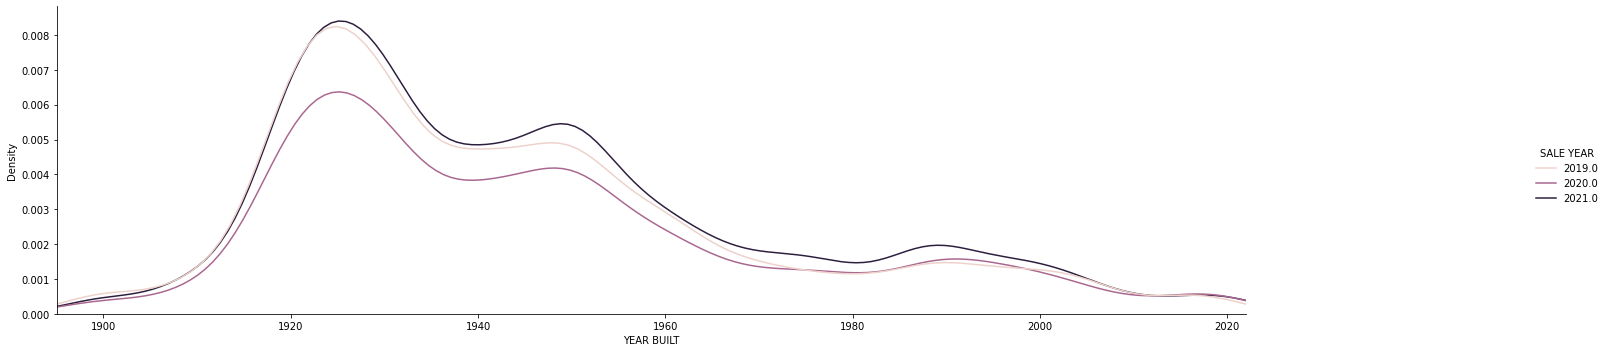

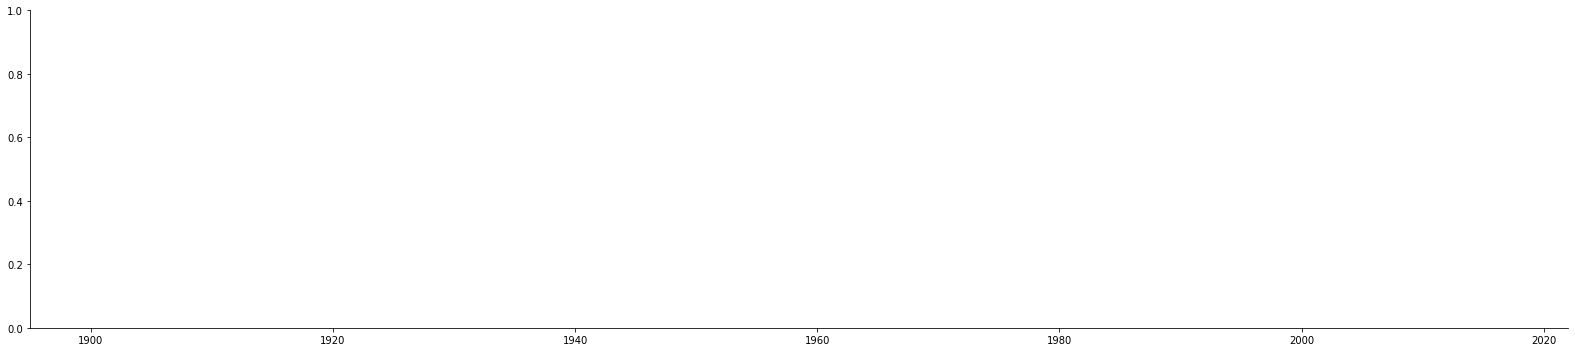

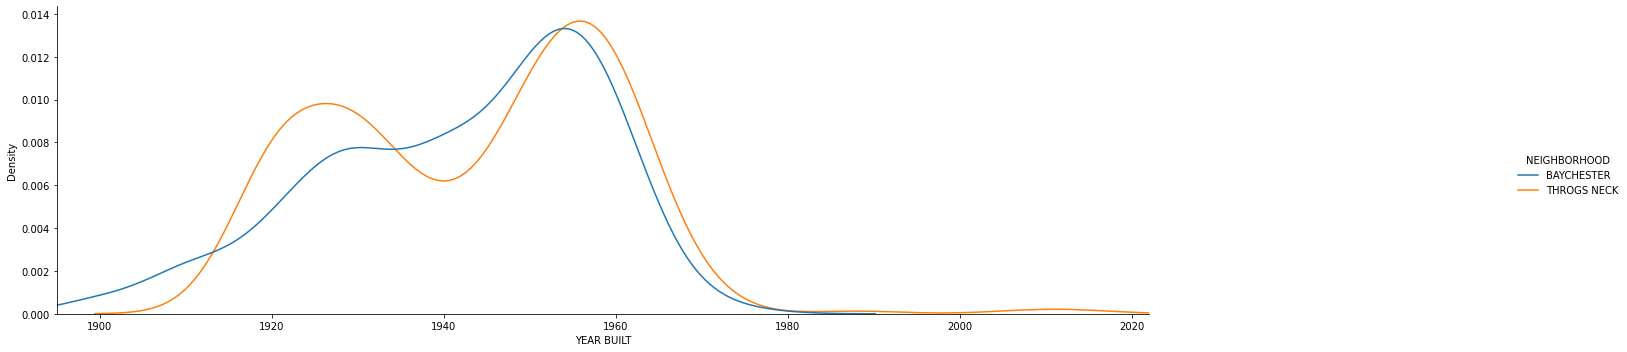

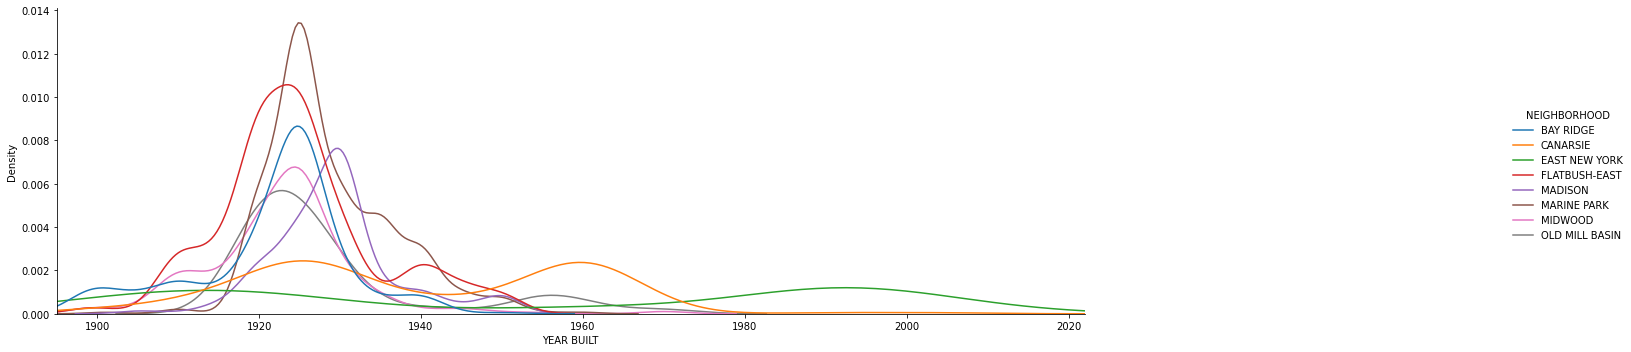

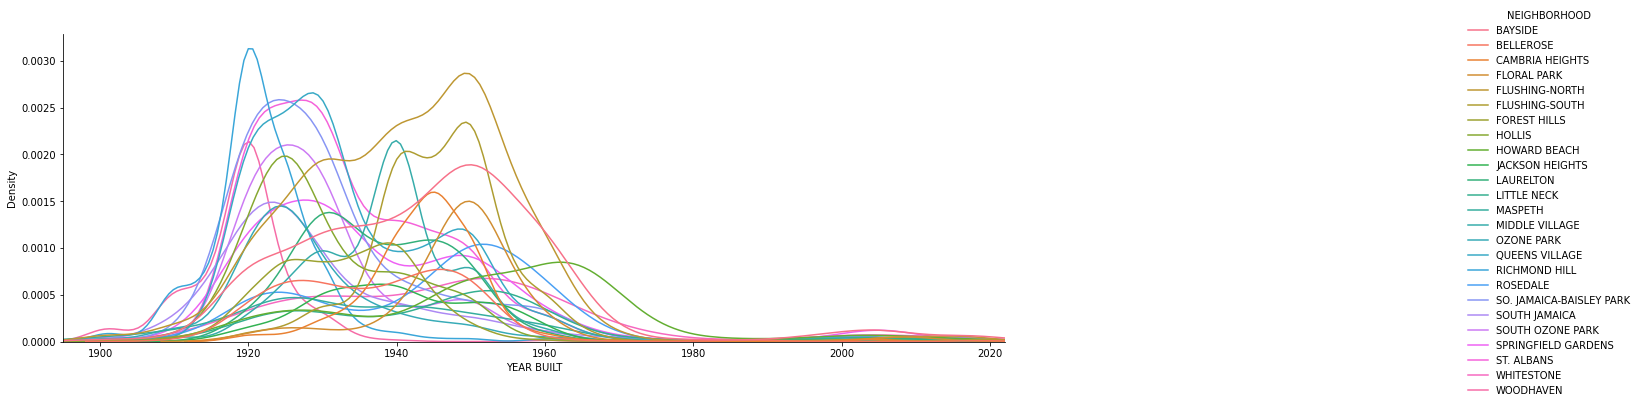

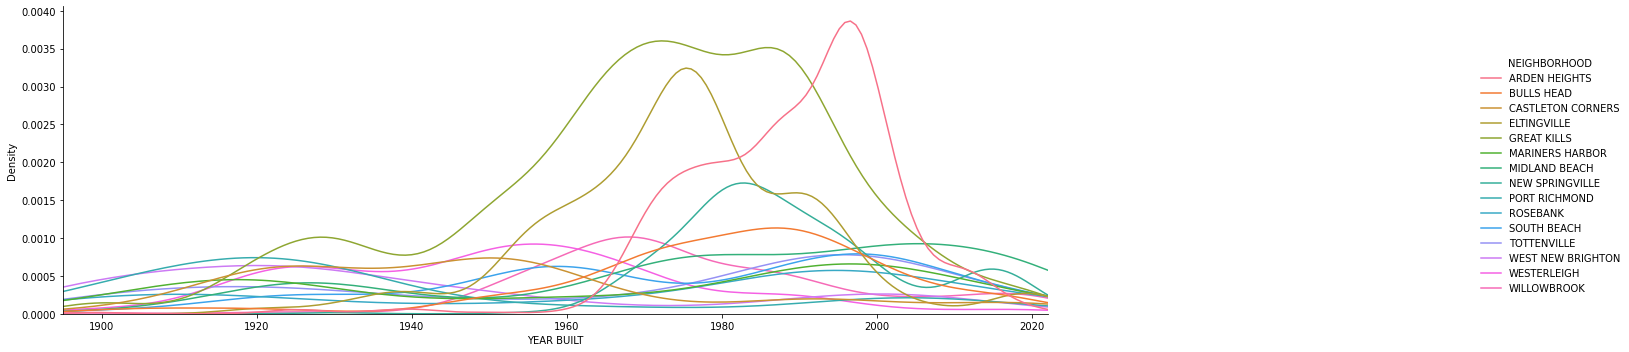

In [ ]:
def yearbuilt_borough_visualization():
  histogram_yearbuilt_borough_kde([2019,2020,2021],[1,2,3,4,5], 0)
  #histogram_yearbuilt_borough_ecdf([2019,2020,2021],[1,2,3,4,5],1)

  detail = 1

  if detail == 1:
    summary = 2
    histogram_yearbuilt_borough_kde([2019,2020,2021],[1],summary)
    #histogram_yearbuilt_borough_ecdf([2019,2020,2021],[1])

    histogram_yearbuilt_borough_kde([2019,2020,2021],[2],summary)
    #histogram_yearbuilt_borough_ecdf([2019,2020,2021],[2])

    histogram_yearbuilt_borough_kde([2019,2020,2021],[3],summary)
    #histogram_yearbuilt_borough_ecdf([2019,2020,2021],[3])

    histogram_yearbuilt_borough_kde([2019,2020,2021],[4],summary)
    #histogram_yearbuilt_borough_ecdf([2019,2020,2021],[4])

    histogram_yearbuilt_borough_kde([2019,2020,2021],[5],summary)
    #histogram_yearbuilt_borough_ecdf([2019,2020,2021],[5])


yearbuilt_borough_visualization()

### 5.3.2 Borough and Neighborhood - Monthly & Correlation


-----------------[1]HARLEM-CENTRAL----------------
count    9.000000e+00
mean     1.360356e+06
std      6.100813e+05
min      3.042000e+05
25%      1.250000e+06
50%      1.550000e+06
75%      1.800000e+06
max      1.950000e+06
Name: SALE PRICE, dtype: float64
--------------------------------------
-----------------[1]INWOOD----------------
count    7.000000e+00
mean     8.275714e+05
std      3.570541e+05
min      3.750000e+05
25%      6.795000e+05
50%      7.390000e+05
75%      8.950000e+05
max      1.530000e+06
Name: SALE PRICE, dtype: float64
--------------------------------------
-----------------[1]HARLEM-UPPER----------------
count    3.000000e+00
mean     1.600000e+06
std      4.358899e+05
min      1.100000e+06
25%      1.450000e+06
50%      1.800000e+06
75%      1.850000e+06
max      1.900000e+06
Name: SALE PRICE, dtype: float64
--------------------------------------
-----------------[1]GREENWICH VILLAGE-WEST----------------
count    2.000000e+00
mean     1.119490e+06
std      8

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


-----------------[2]WAKEFIELD----------------
count       156.000000
mean     459766.032051
std      106593.784218
min      210000.000000
25%      395000.000000
50%      470000.000000
75%      530000.000000
max      935000.000000
Name: SALE PRICE, dtype: float64
--------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


-----------------[2]WILLIAMSBRIDGE----------------
count       146.000000
mean     432171.321918
std      122311.677243
min      150000.000000
25%      350000.000000
50%      455000.000000
75%      520000.000000
max      810000.000000
Name: SALE PRICE, dtype: float64
--------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


-----------------[2]SCHUYLERVILLE/PELHAM BAY----------------
count    1.410000e+02
mean     5.617447e+05
std      1.273023e+05
min      2.450000e+05
25%      4.990000e+05
50%      5.600000e+05
75%      6.150000e+05
max      1.180000e+06
Name: SALE PRICE, dtype: float64
--------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


-----------------[2]BRONXDALE----------------
count       136.000000
mean     450417.808824
std      106690.246546
min      150000.000000
25%      388750.000000
50%      480000.000000
75%      510000.000000
max      750000.000000
Name: SALE PRICE, dtype: float64
--------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


-----------------[2]MORRIS PARK/VAN NEST----------------
count       135.000000
mean     554572.192593
std      120068.704608
min      139875.000000
25%      460500.000000
50%      559000.000000
75%      642000.000000
max      880000.000000
Name: SALE PRICE, dtype: float64
--------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


-----------------[2]SOUNDVIEW----------------
count       131.000000
mean     436413.770992
std      136899.891339
min      120000.000000
25%      336331.000000
50%      465000.000000
75%      525000.000000
max      822252.000000
Name: SALE PRICE, dtype: float64
--------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


-----------------[2]RIVERDALE----------------
count    1.200000e+02
mean     9.672826e+05
std      3.610035e+05
min      1.314580e+05
25%      7.235000e+05
50%      8.825000e+05
75%      1.136250e+06
max      1.960000e+06
Name: SALE PRICE, dtype: float64
--------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


-----------------[4]FLUSHING-NORTH----------------
count    1.176000e+03
mean     9.249696e+05
std      2.303061e+05
min      1.185000e+05
25%      8.080000e+05
50%      9.000000e+05
75%      9.950000e+05
max      1.960000e+06
Name: SALE PRICE, dtype: float64
--------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


-----------------[4]ST. ALBANS----------------
count    8.640000e+02
mean     5.168340e+05
std      1.564815e+05
min      1.120000e+05
25%      4.224750e+05
50%      5.212500e+05
75%      6.100000e+05
max      1.800000e+06
Name: SALE PRICE, dtype: float64
--------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


-----------------[4]BAYSIDE----------------
count    8.600000e+02
mean     9.226460e+05
std      2.700569e+05
min      1.054440e+05
25%      7.700000e+05
50%      8.835000e+05
75%      9.990000e+05
max      1.970000e+06
Name: SALE PRICE, dtype: float64
--------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


-----------------[4]QUEENS VILLAGE----------------
count       834.000000
mean     567726.621103
std      134205.270097
min      104000.000000
25%      495000.000000
50%      580000.000000
75%      650000.000000
max      995000.000000
Name: SALE PRICE, dtype: float64
--------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


-----------------[4]SO. JAMAICA-BAISLEY PARK----------------
count    7.670000e+02
mean     4.816754e+05
std      1.560716e+05
min      1.100000e+05
25%      3.800000e+05
50%      4.770000e+05
75%      5.550000e+05
max      1.150000e+06
Name: SALE PRICE, dtype: float64
--------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


-----------------[4]SPRINGFIELD GARDENS----------------
count    6.430000e+02
mean     5.199723e+05
std      1.560367e+05
min      1.500000e+05
25%      4.240405e+05
50%      5.100000e+05
75%      6.038750e+05
max      1.220000e+06
Name: SALE PRICE, dtype: float64
--------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


-----------------[4]FLUSHING-SOUTH----------------
count    5.810000e+02
mean     8.434084e+05
std      2.355335e+05
min      1.630000e+05
25%      7.350000e+05
50%      8.260000e+05
75%      9.150000e+05
max      1.999000e+06
Name: SALE PRICE, dtype: float64
--------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


-----------------[4]SOUTH OZONE PARK----------------
count    5.500000e+02
mean     5.517315e+05
std      1.616312e+05
min      1.014000e+05
25%      4.516302e+05
50%      5.500000e+05
75%      6.482500e+05
max      1.330000e+06
Name: SALE PRICE, dtype: float64
--------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


-----------------[4]HOLLIS----------------
count    5.120000e+02
mean     5.761419e+05
std      1.487508e+05
min      1.100000e+05
25%      4.887500e+05
50%      5.900000e+05
75%      6.650000e+05
max      1.180000e+06
Name: SALE PRICE, dtype: float64
--------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


-----------------[4]RICHMOND HILL----------------
count    4.880000e+02
mean     5.857798e+05
std      1.391094e+05
min      1.030000e+05
25%      5.200000e+05
50%      5.900000e+05
75%      6.550000e+05
max      1.325000e+06
Name: SALE PRICE, dtype: float64
--------------------------------------


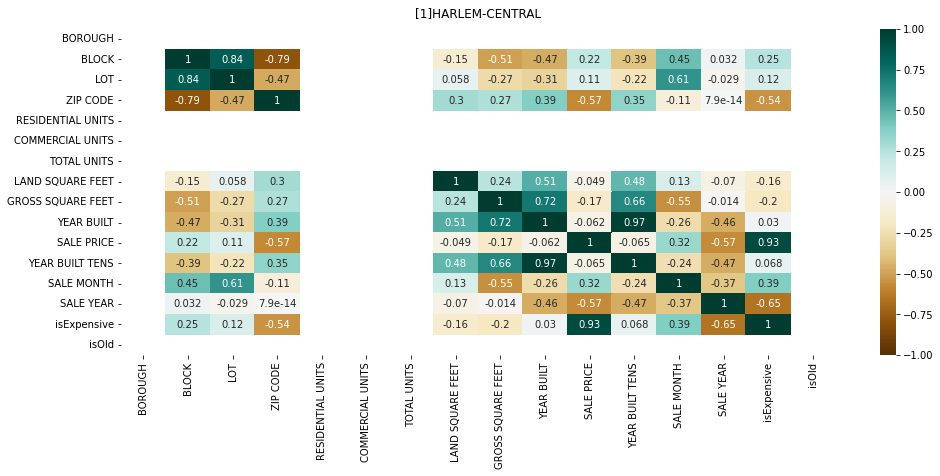

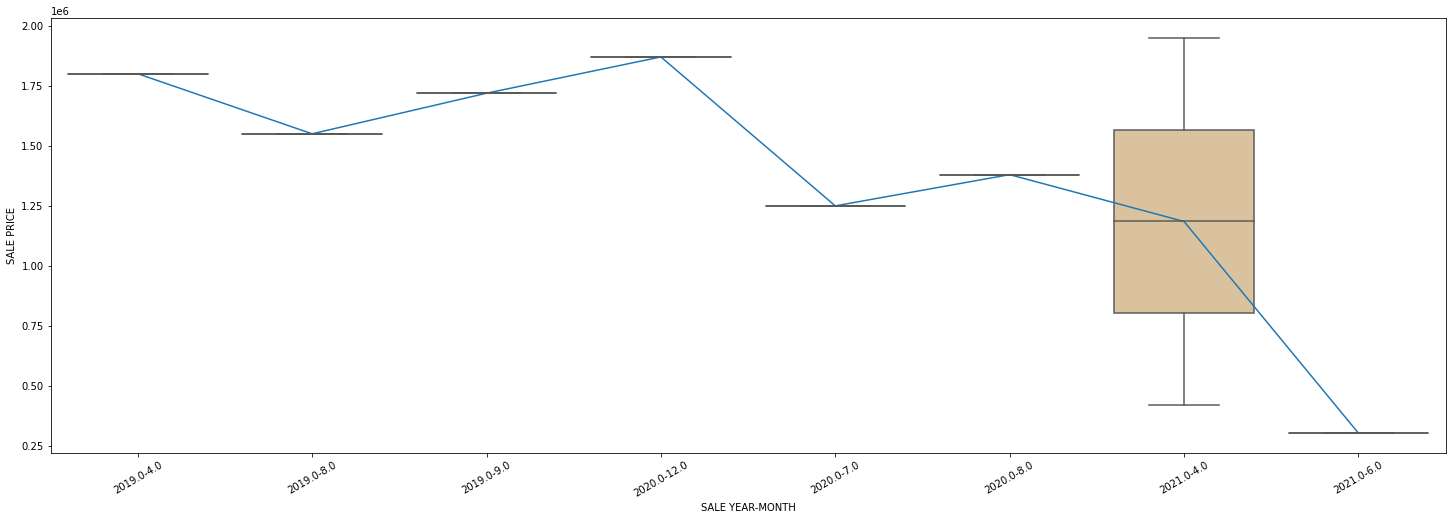

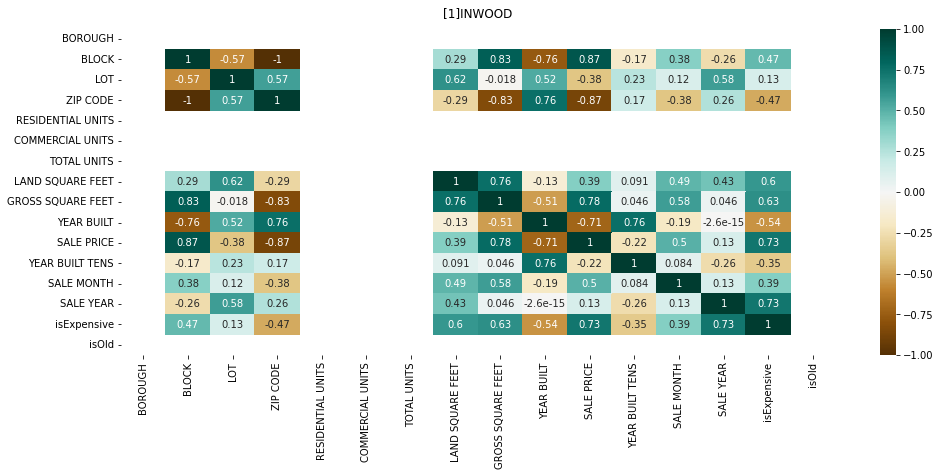

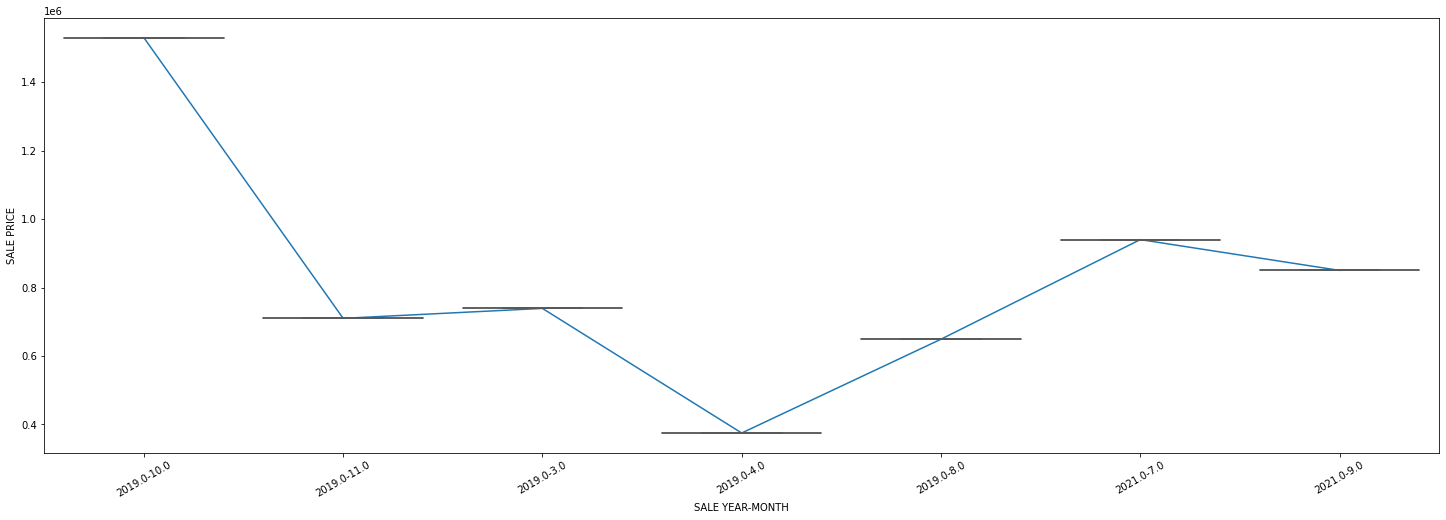

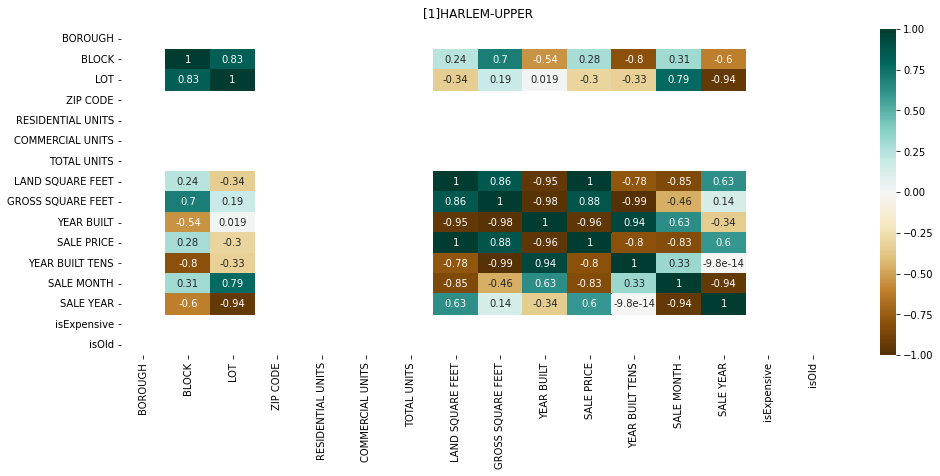

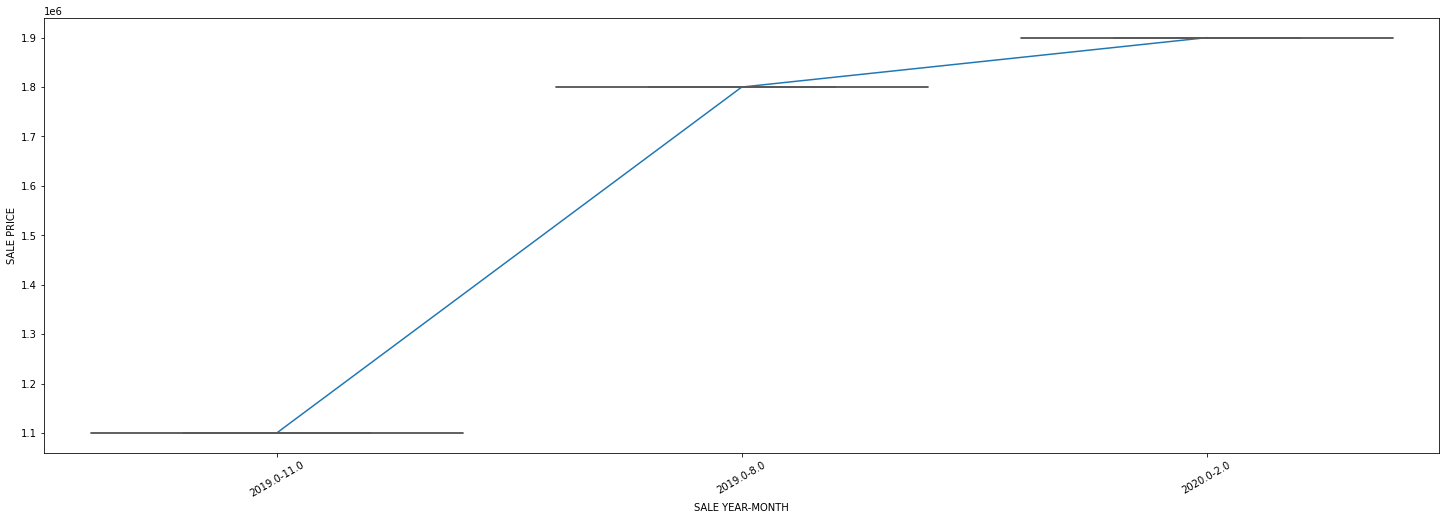

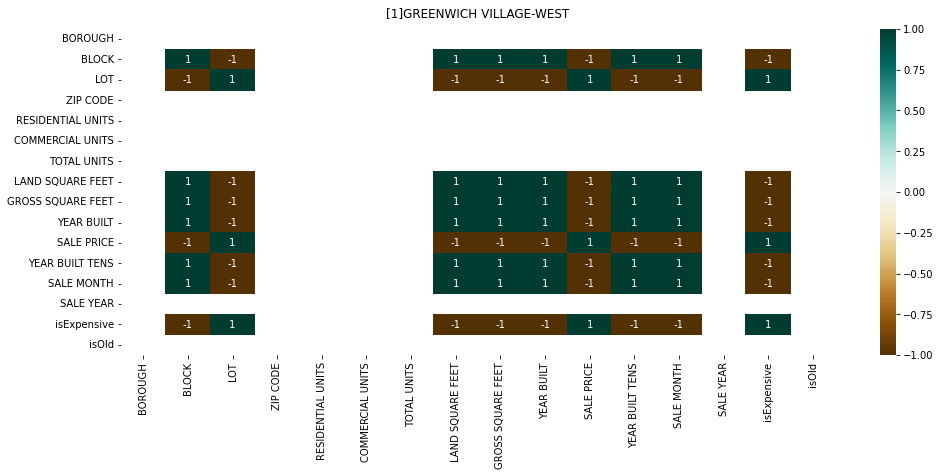

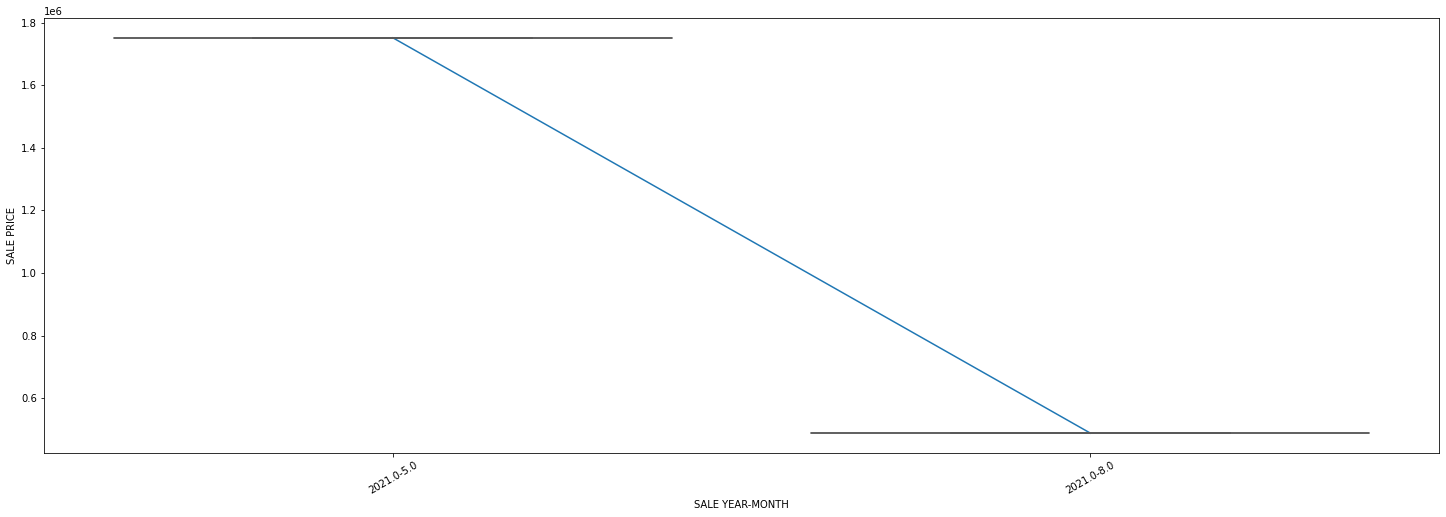

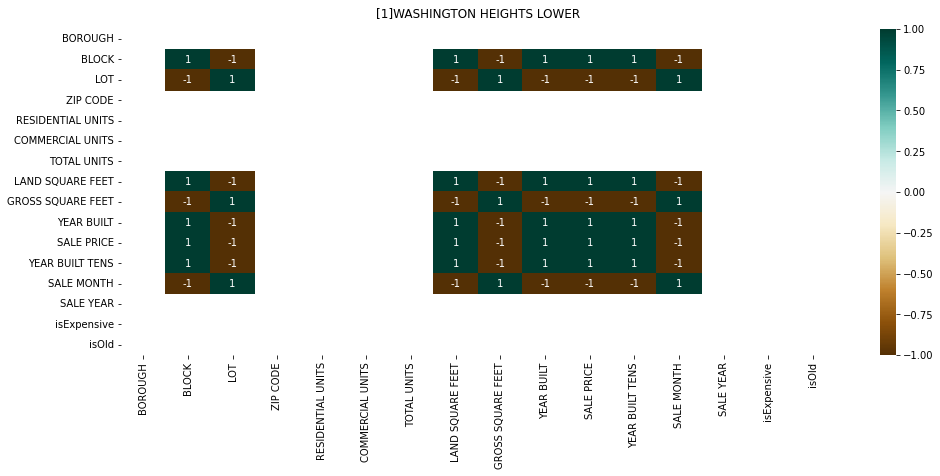

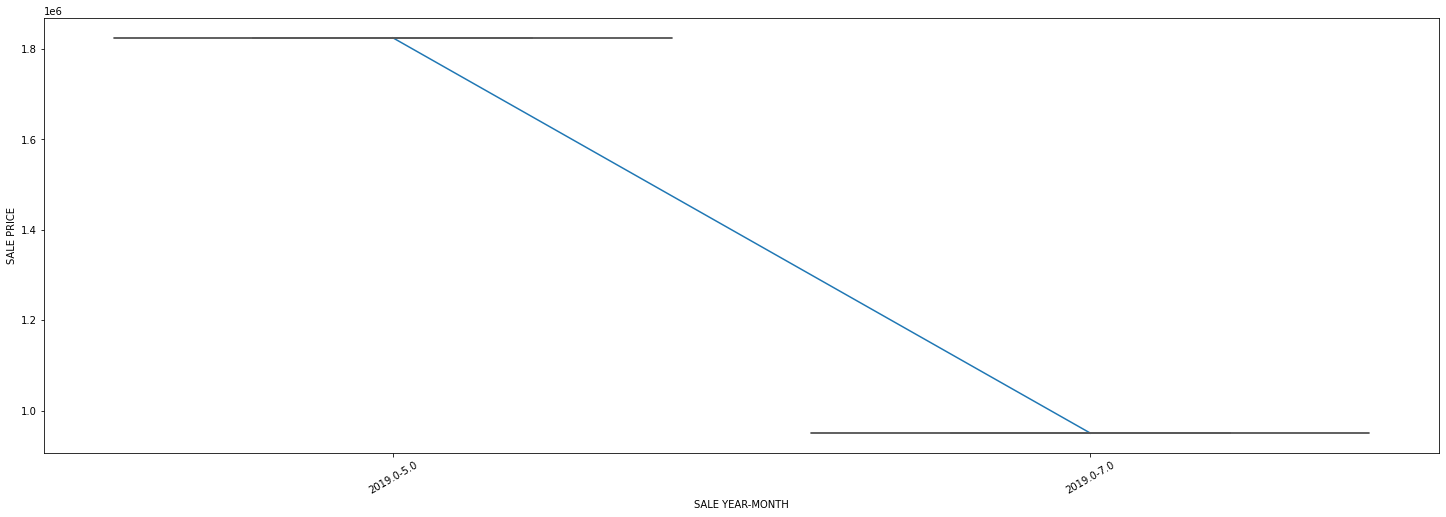

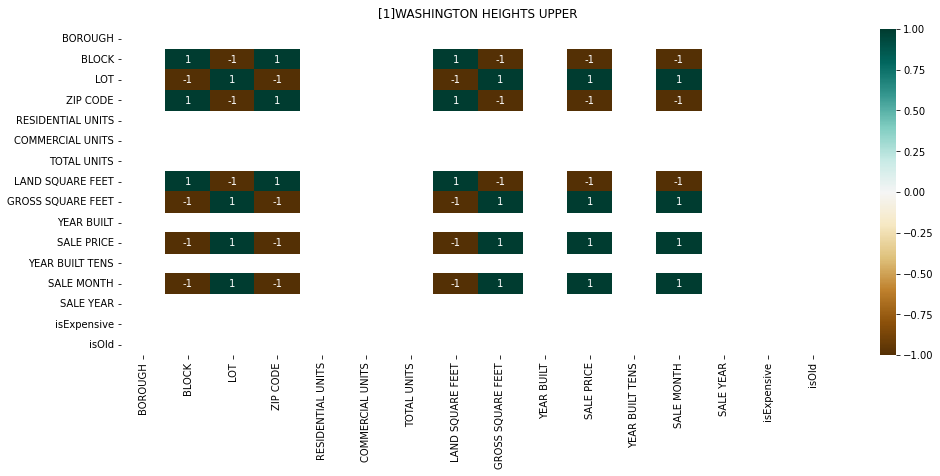

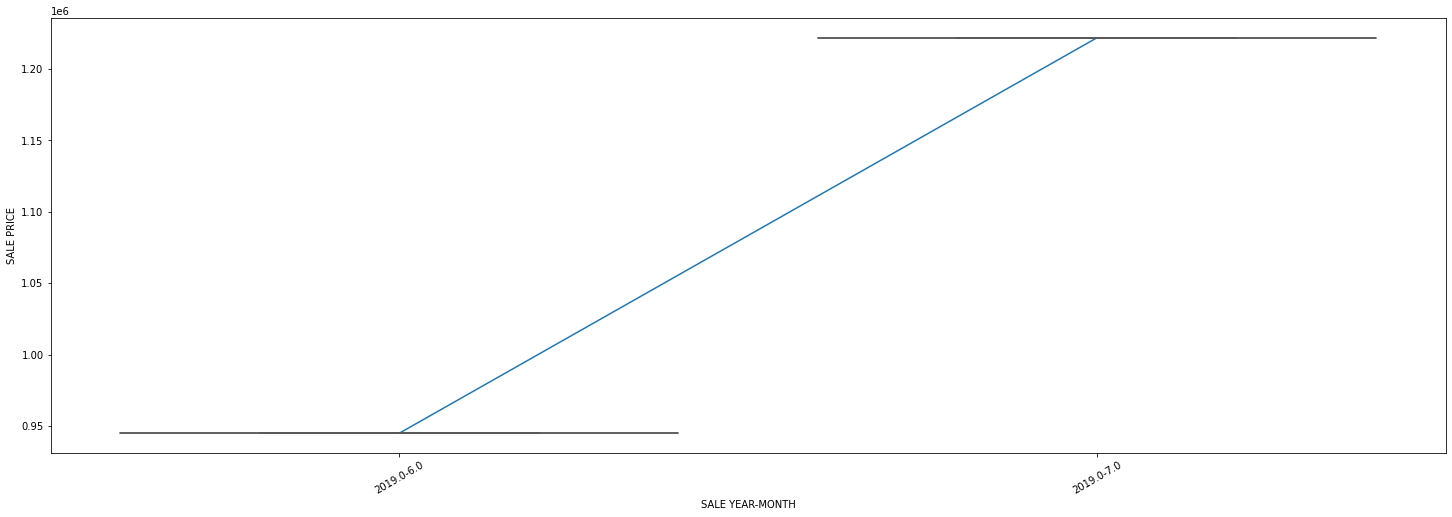

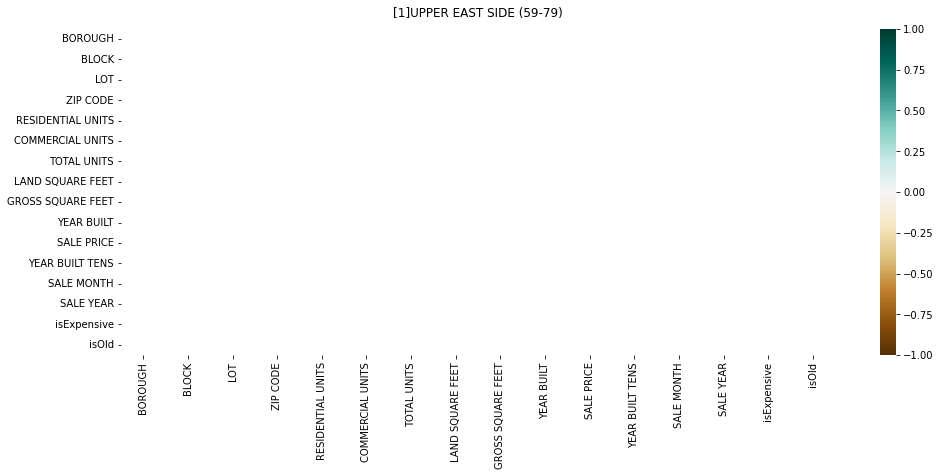

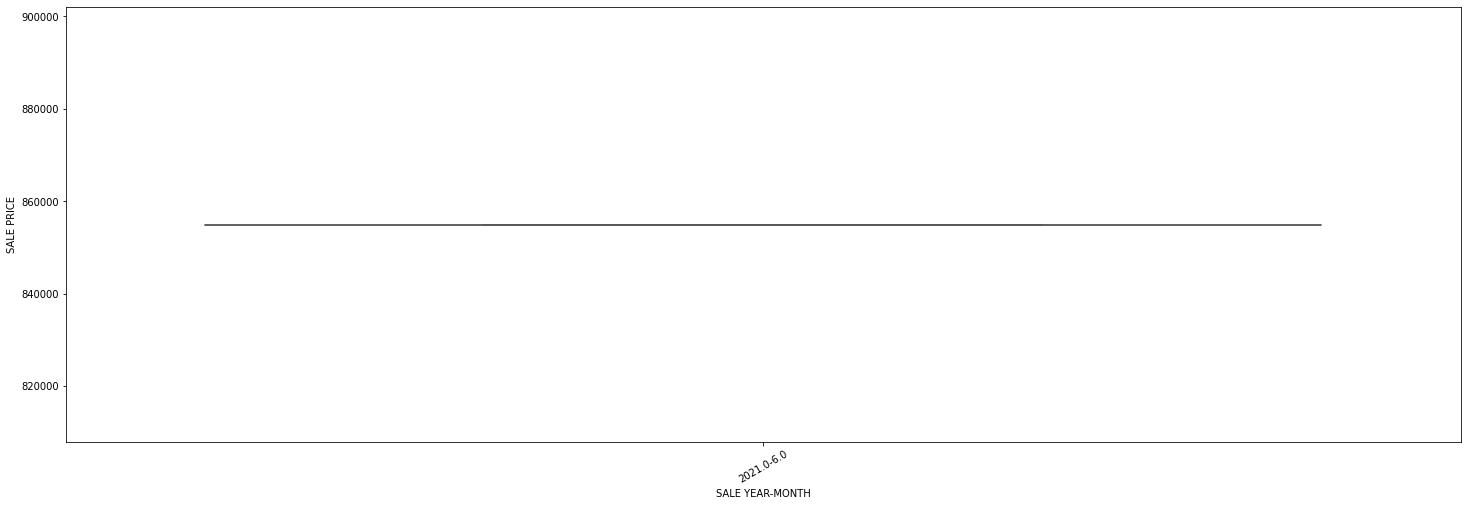

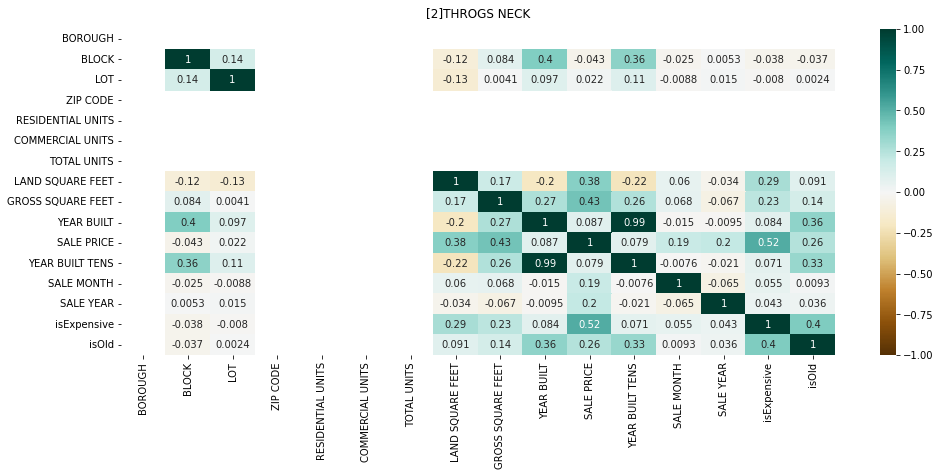

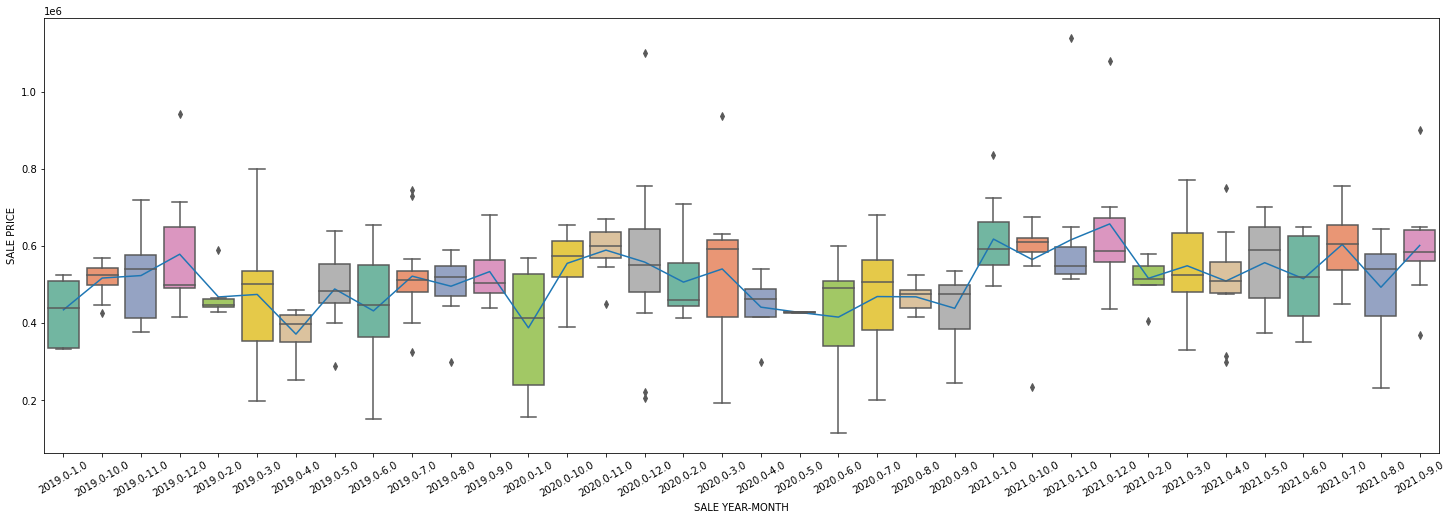

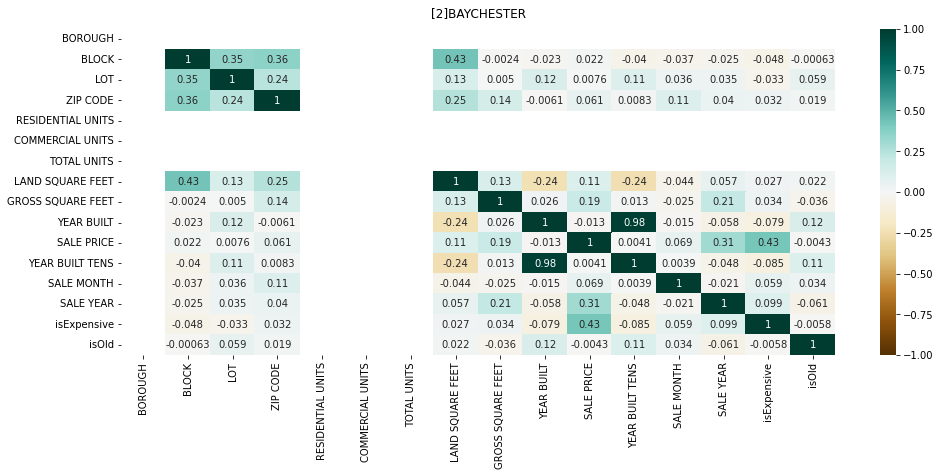

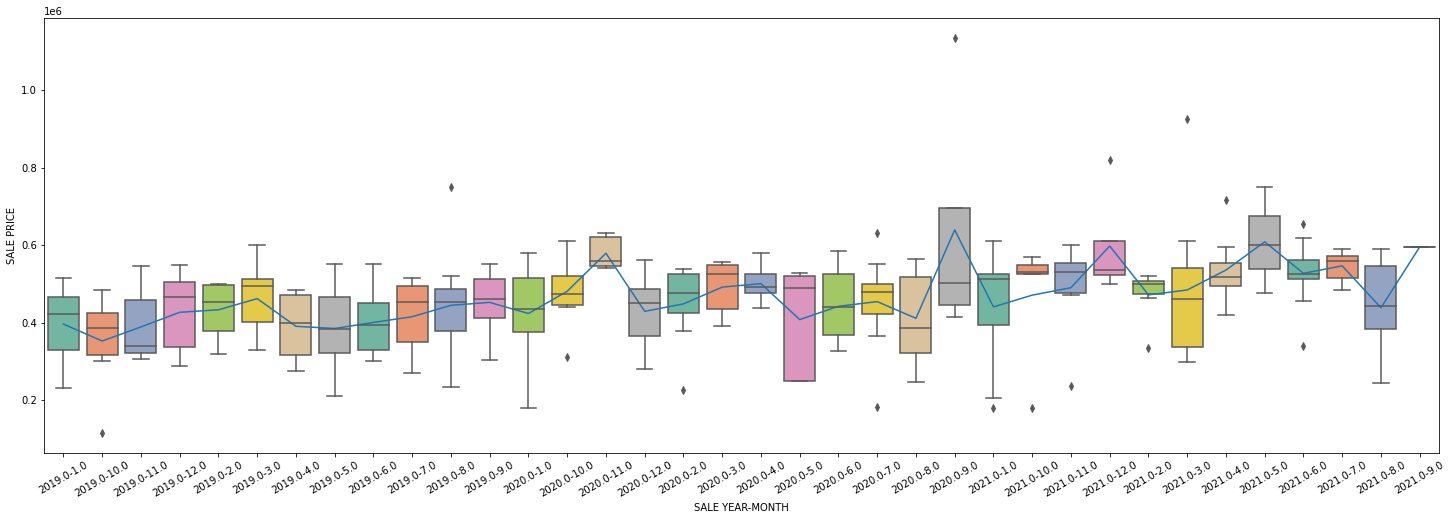

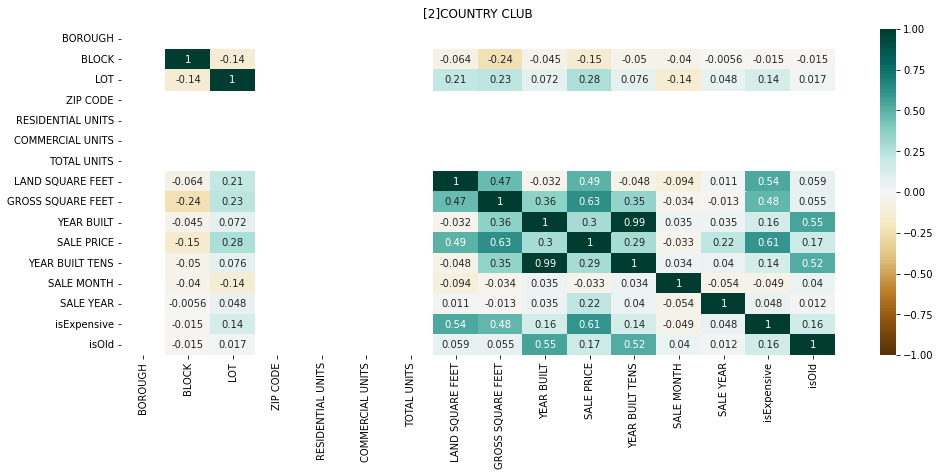

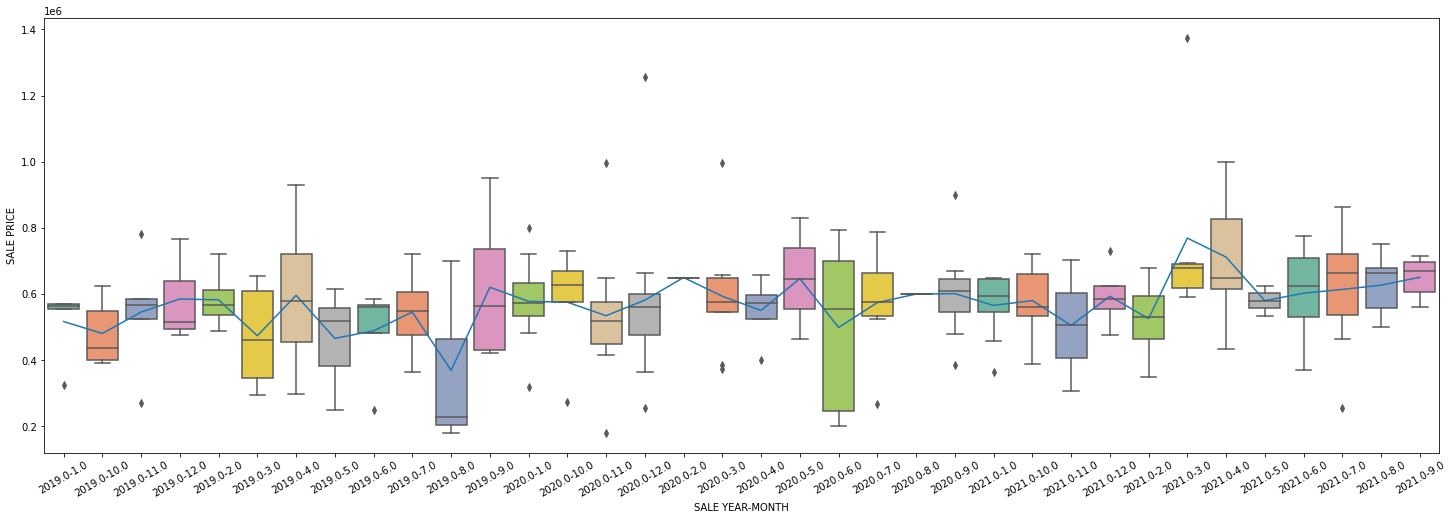

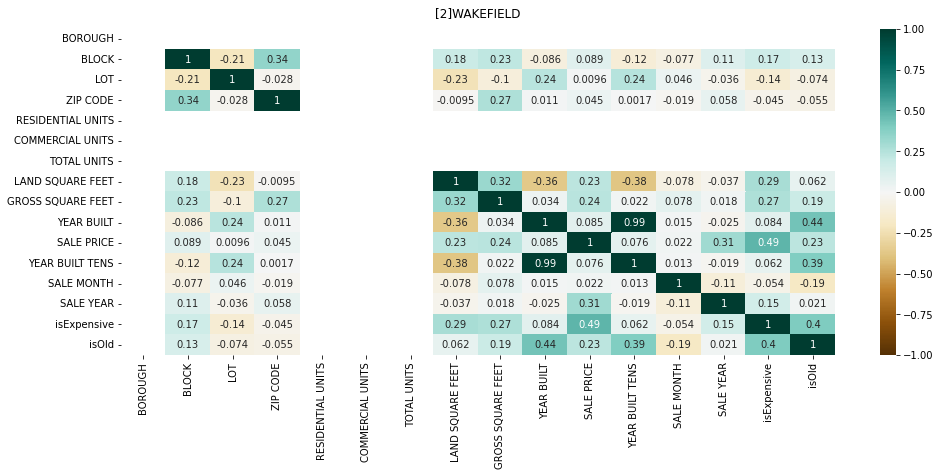

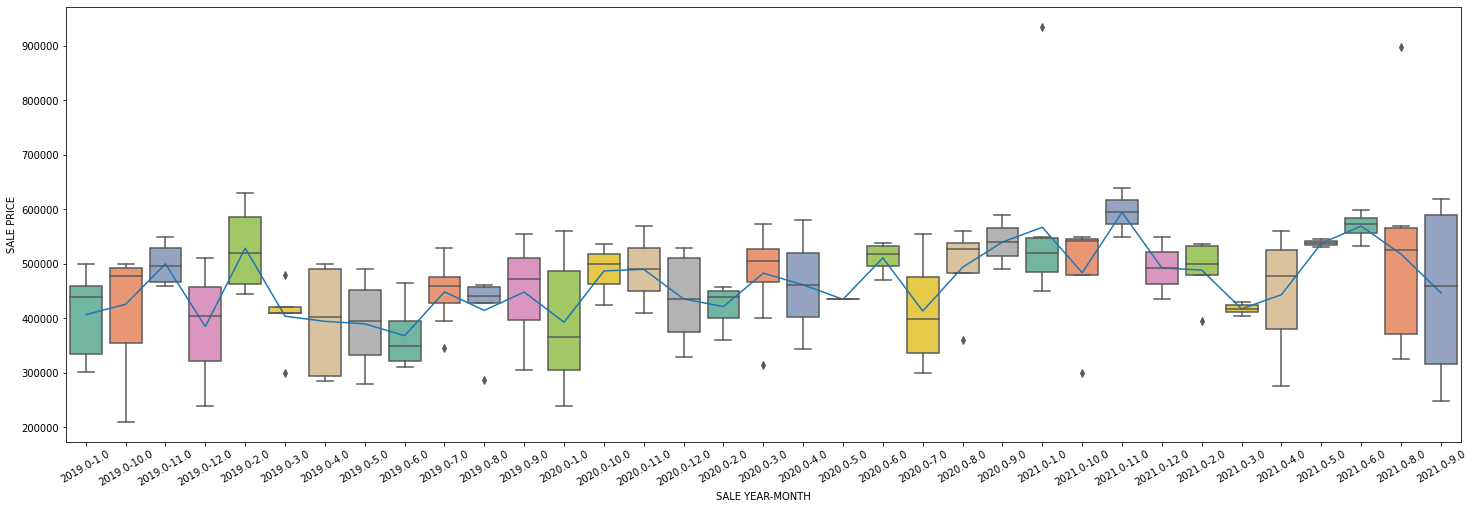

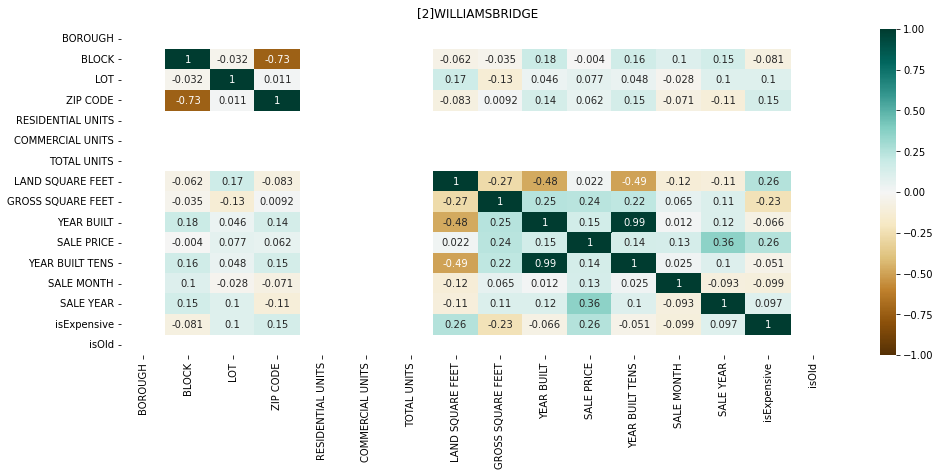

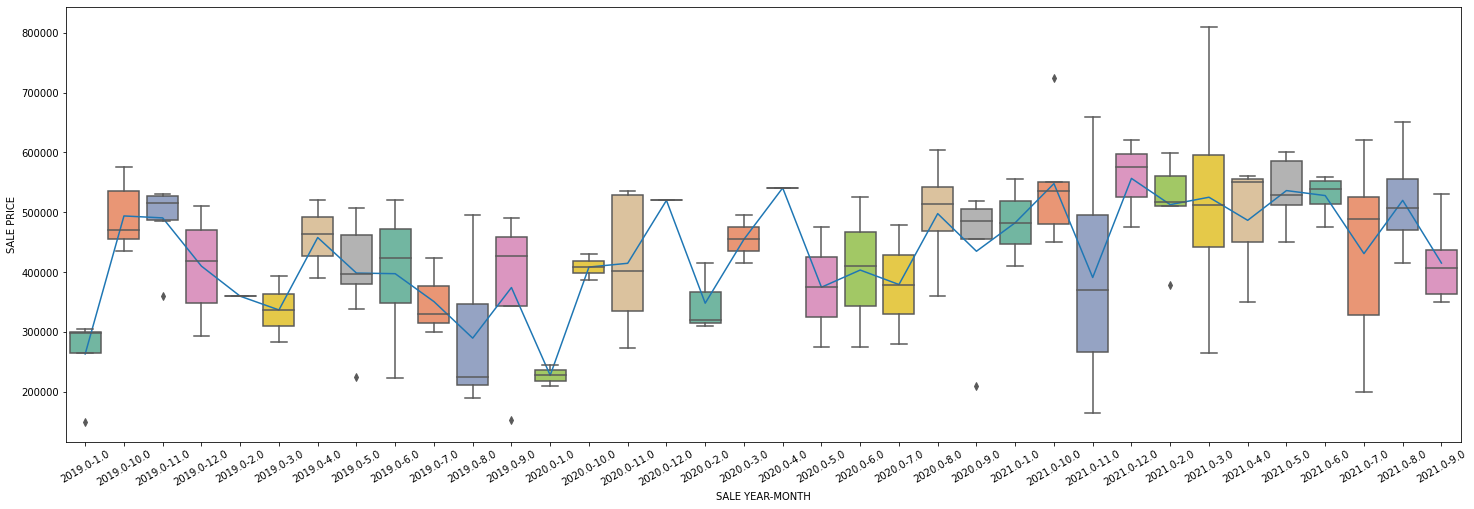

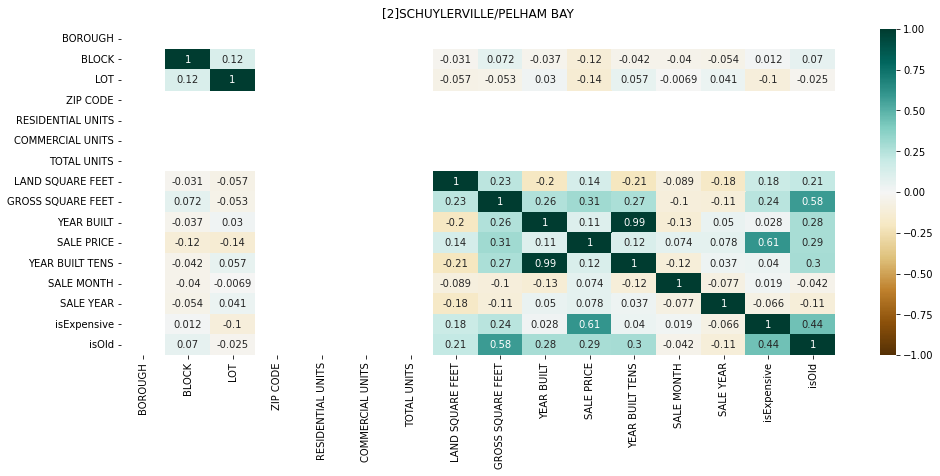

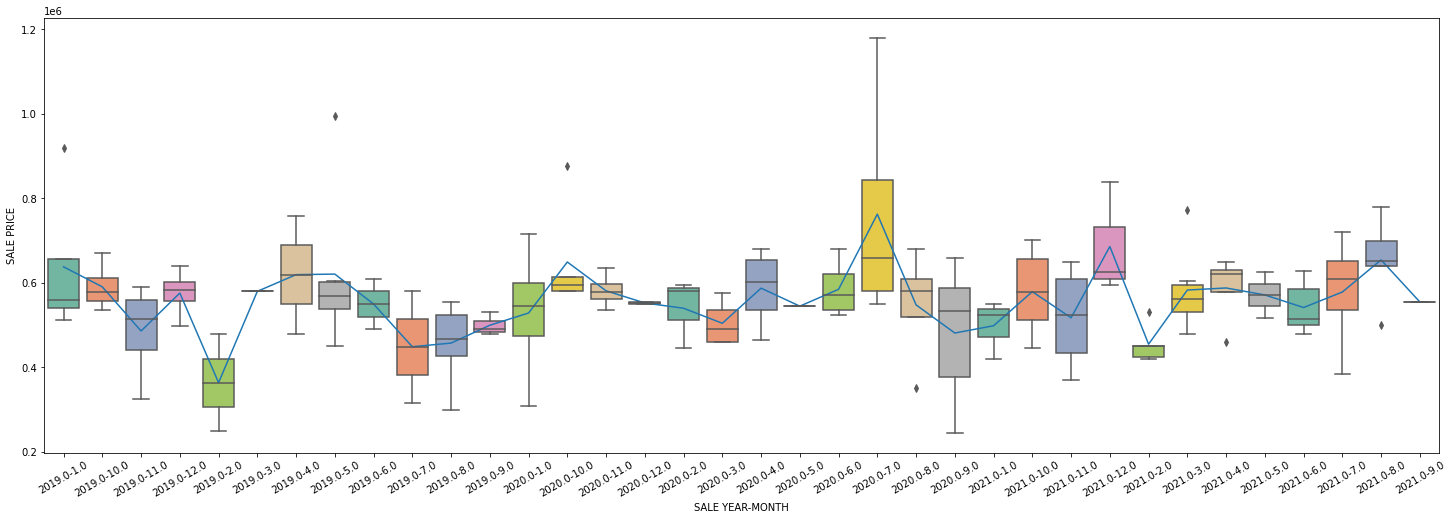

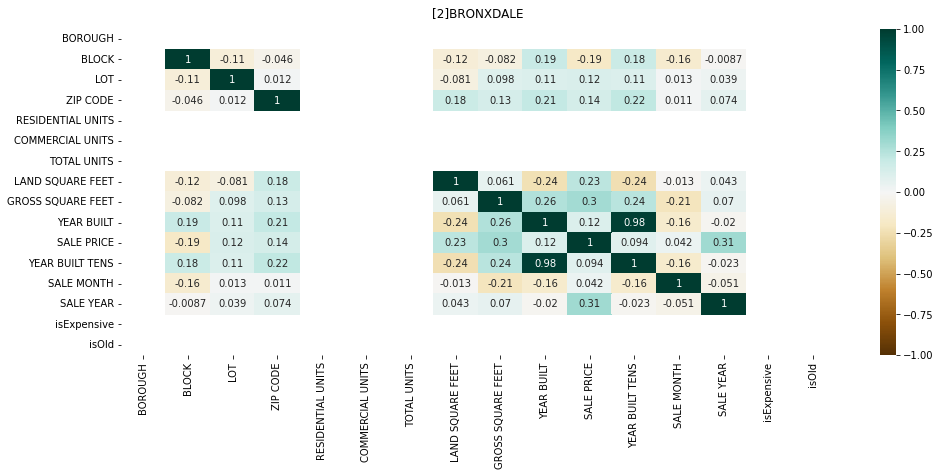

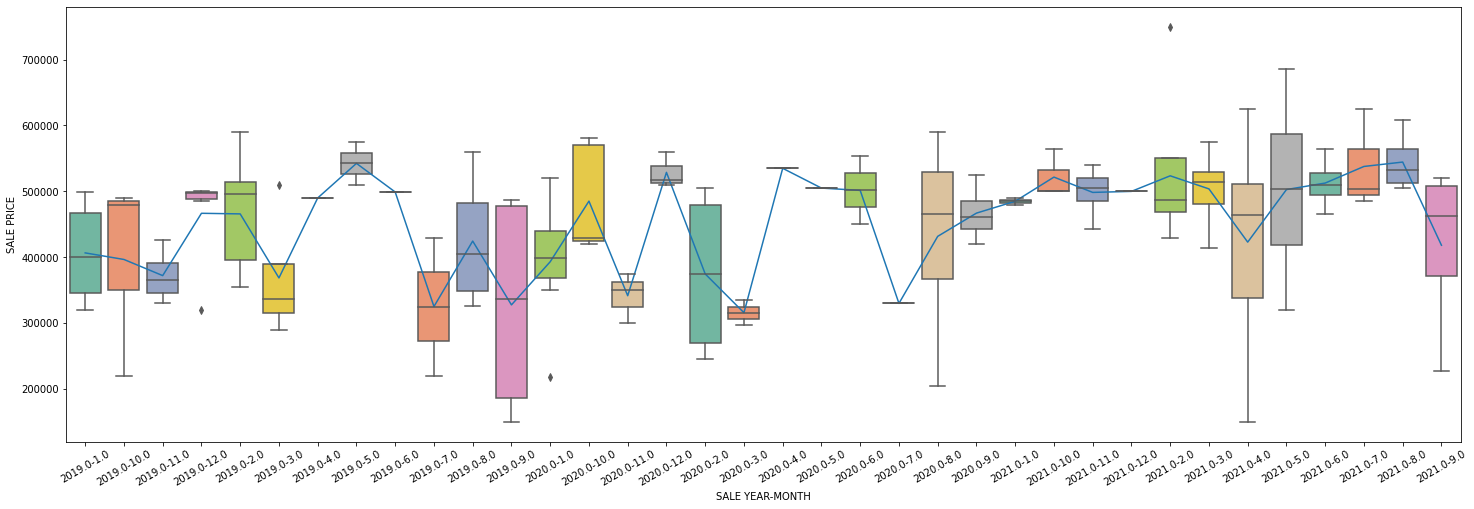

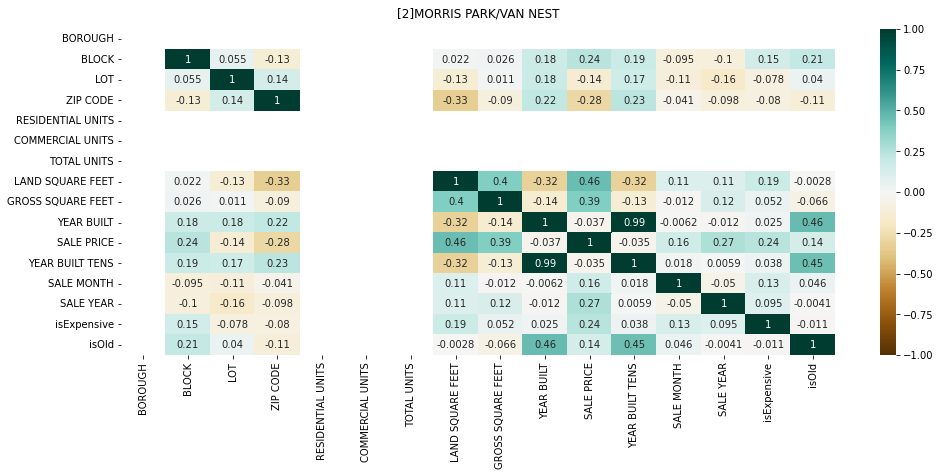

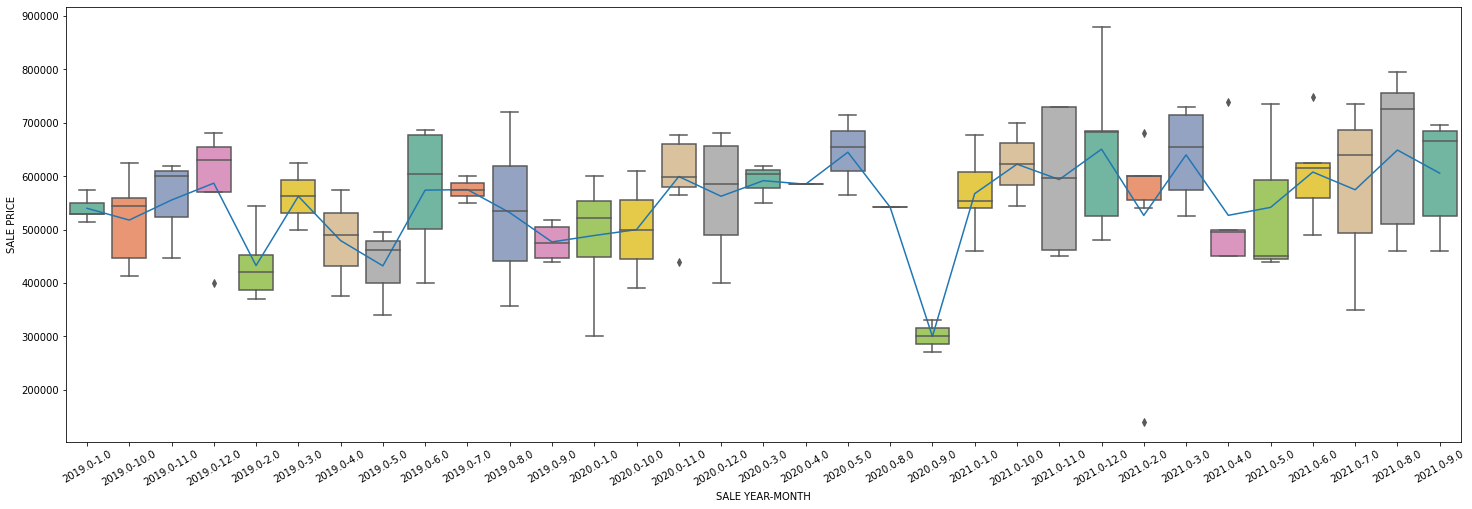

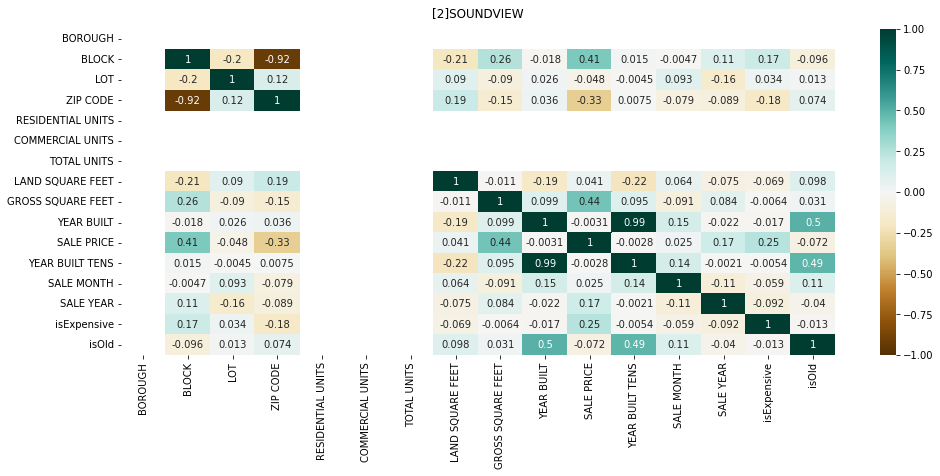

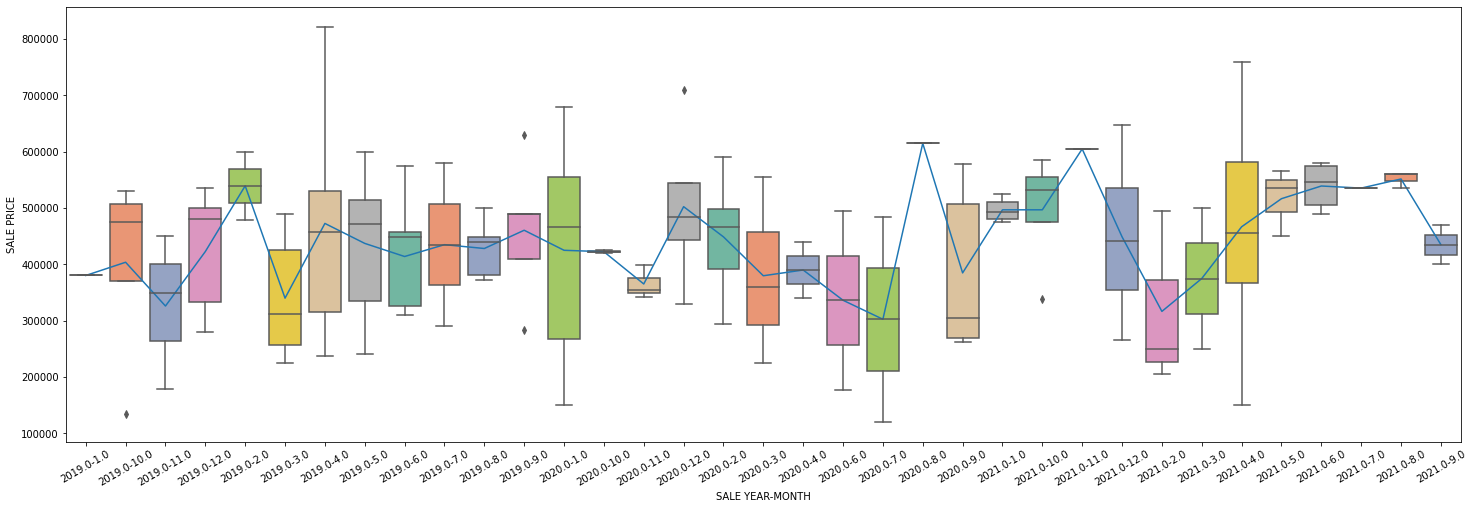

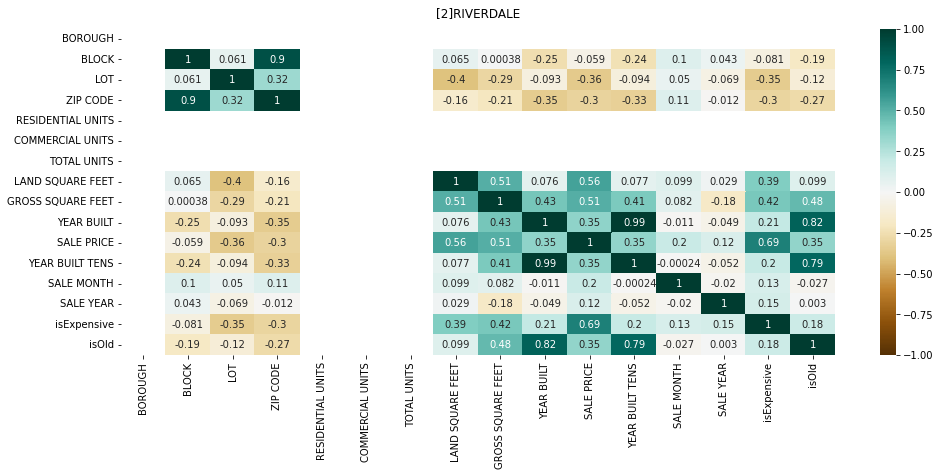

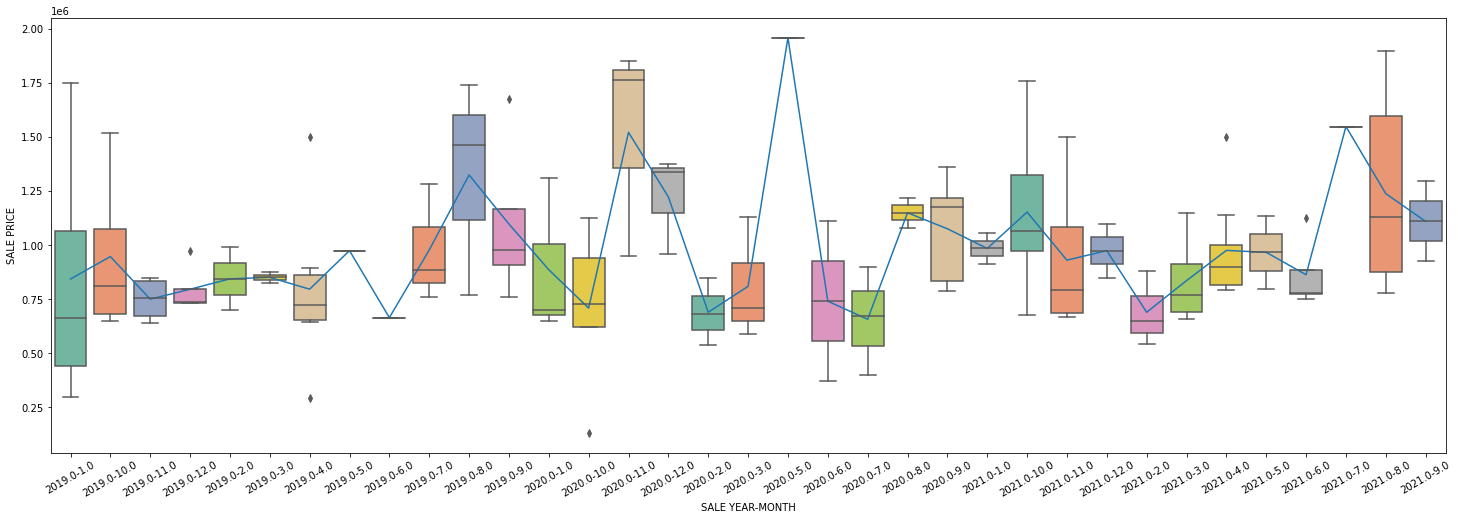

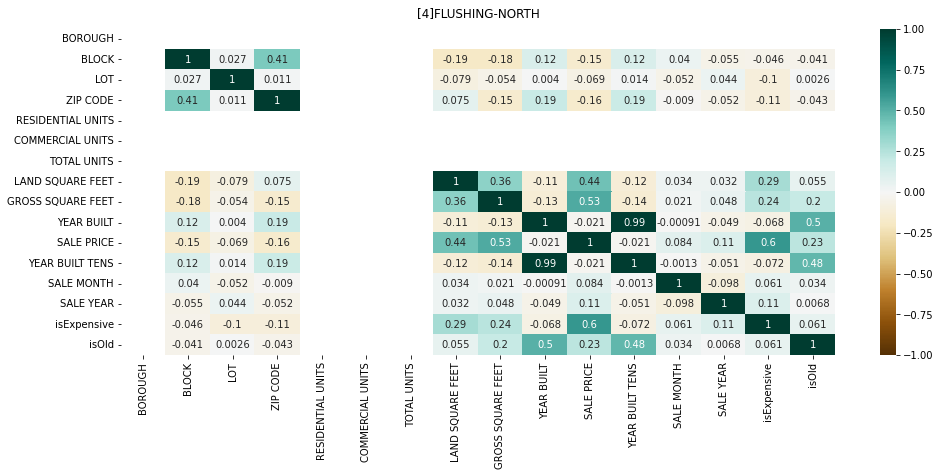

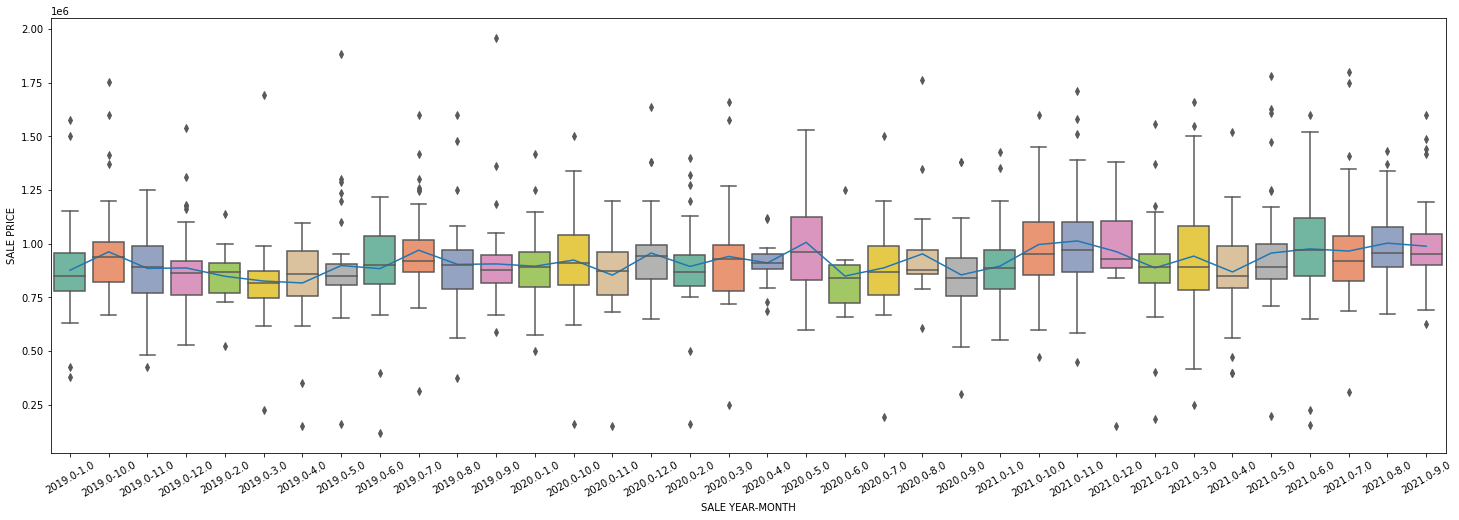

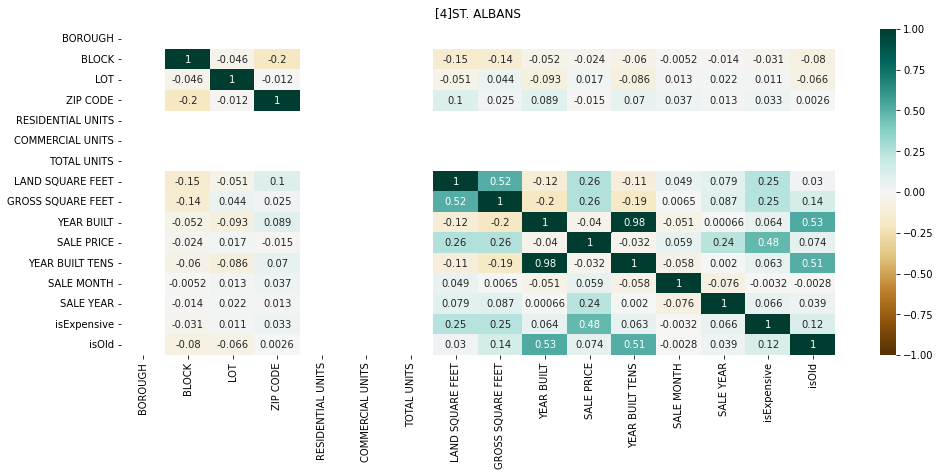

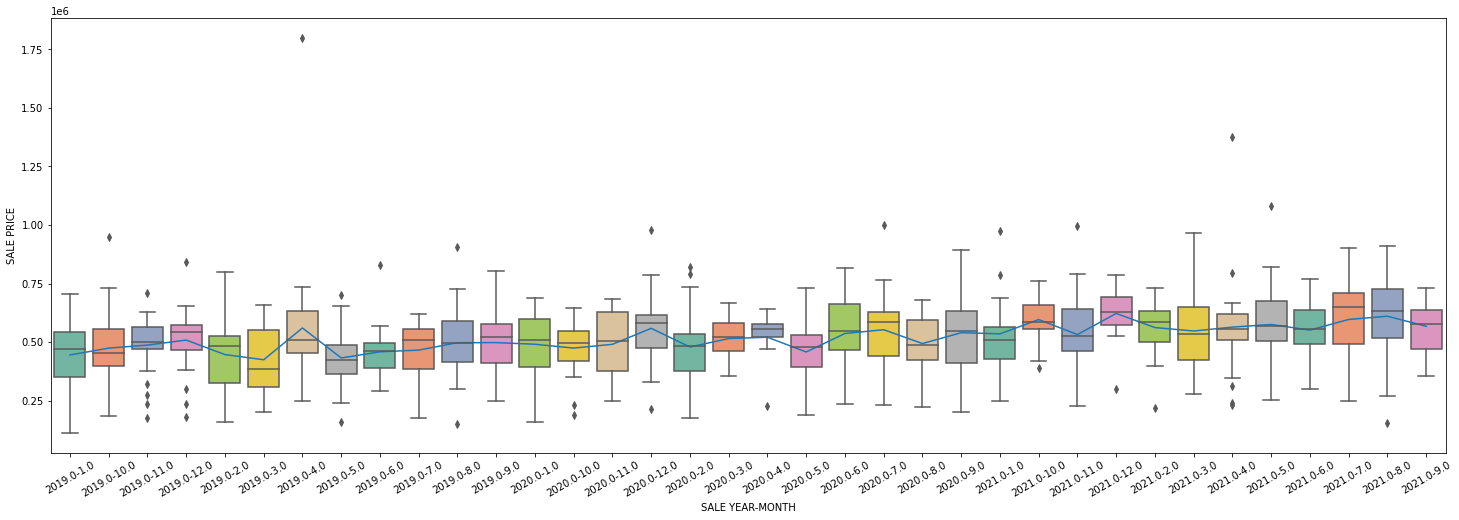

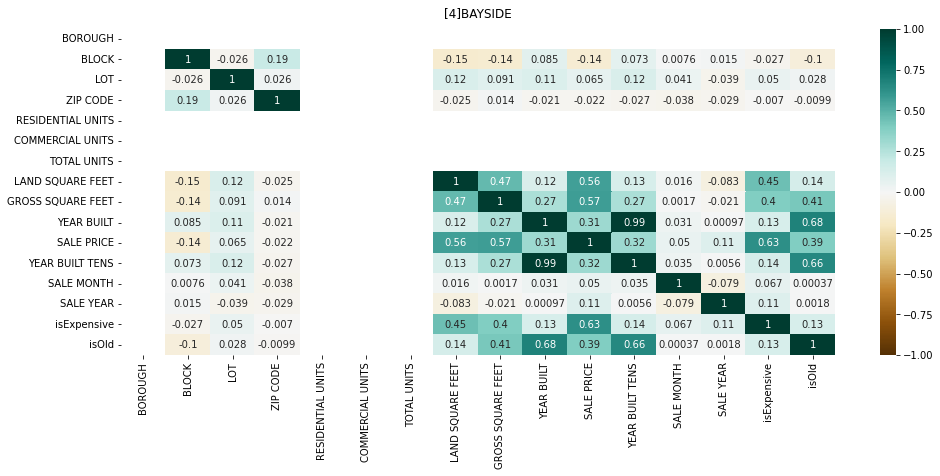

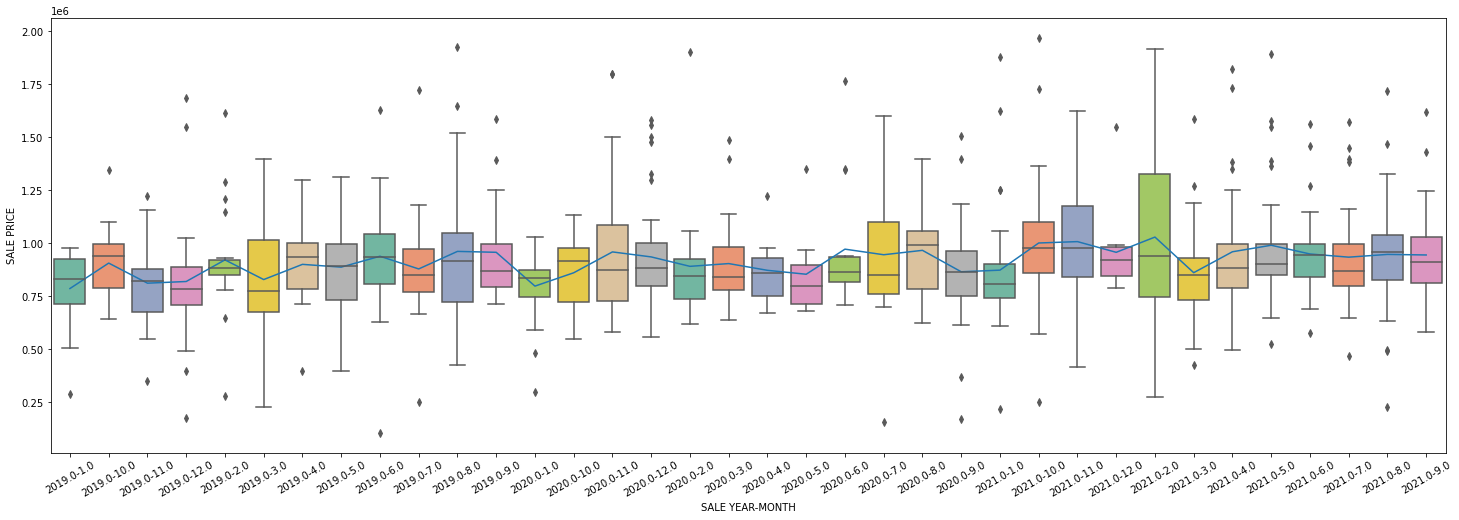

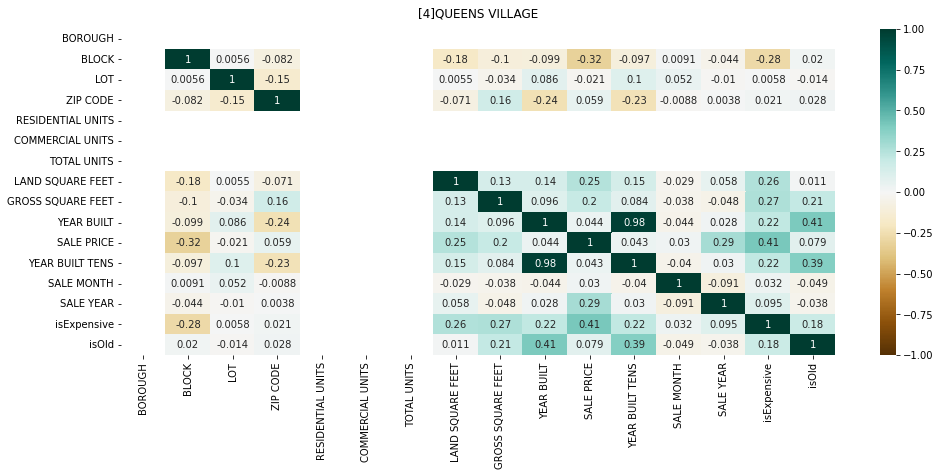

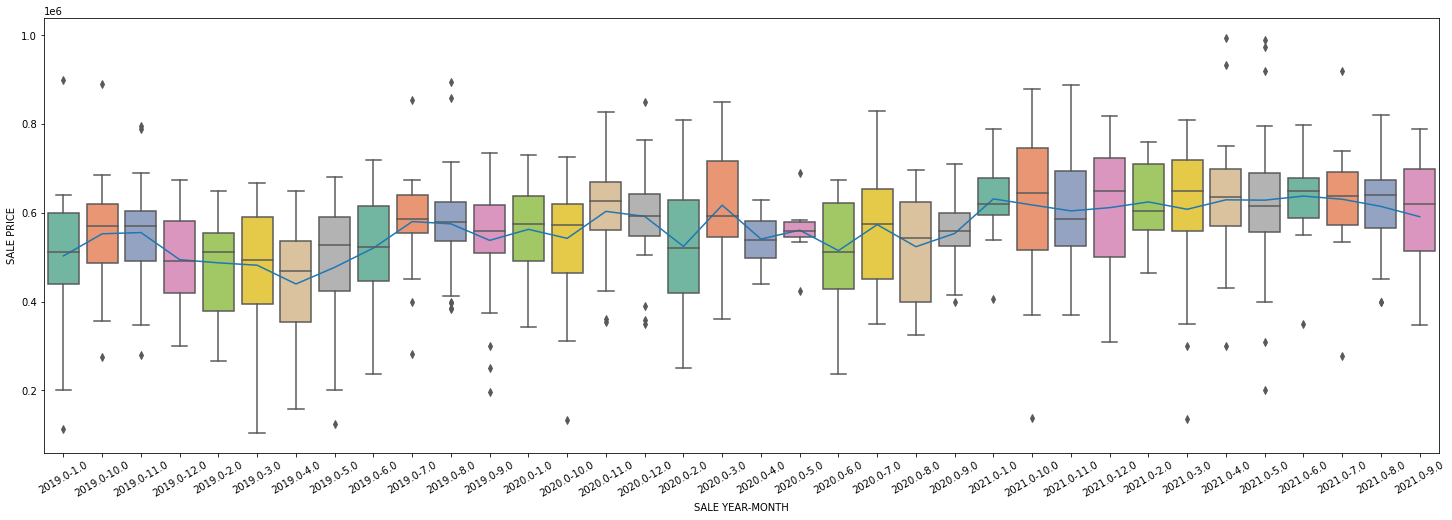

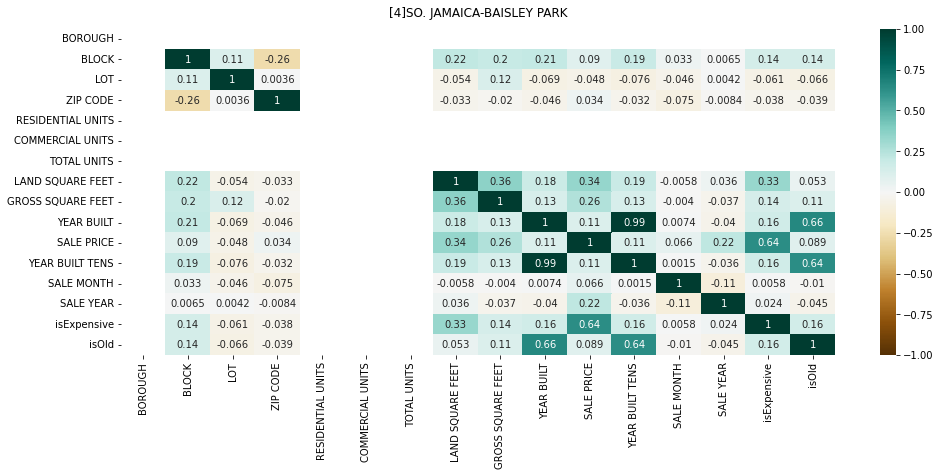

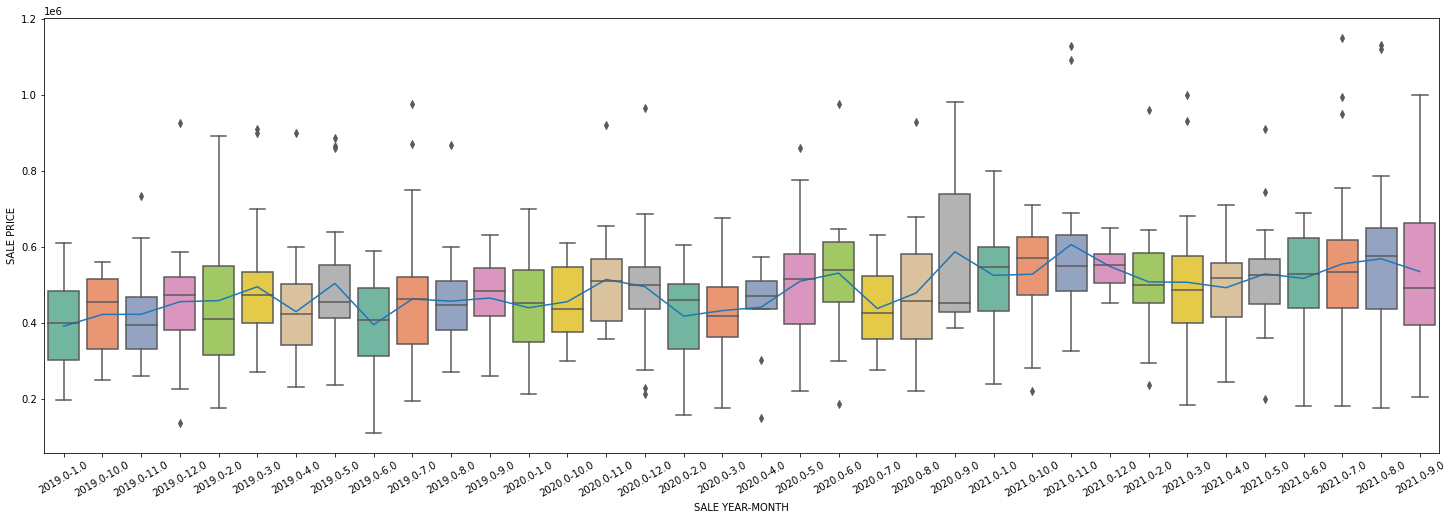

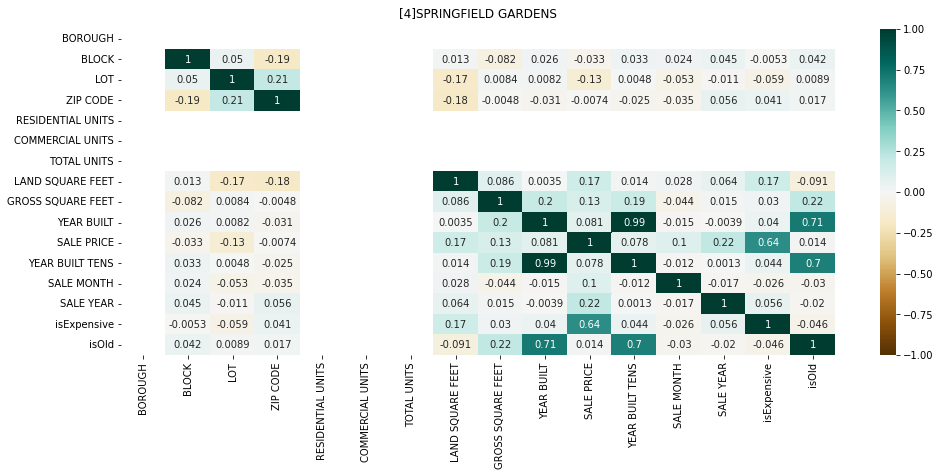

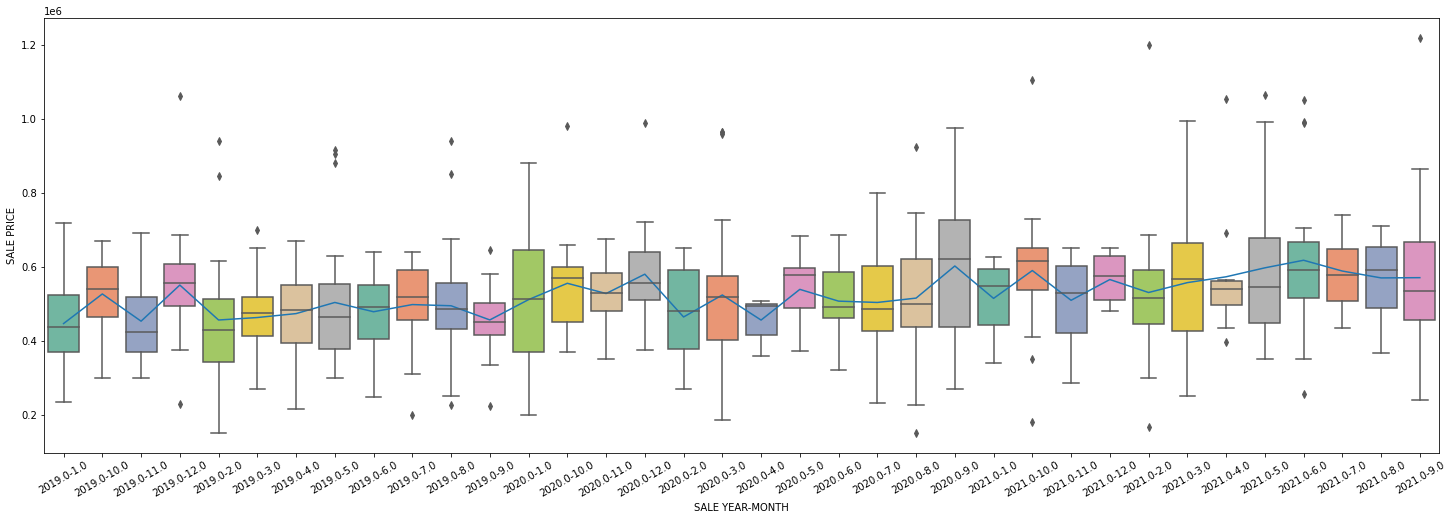

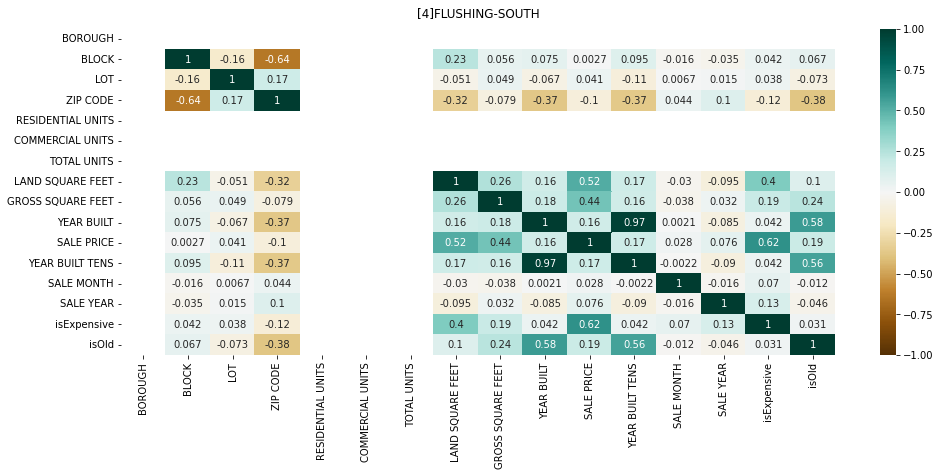

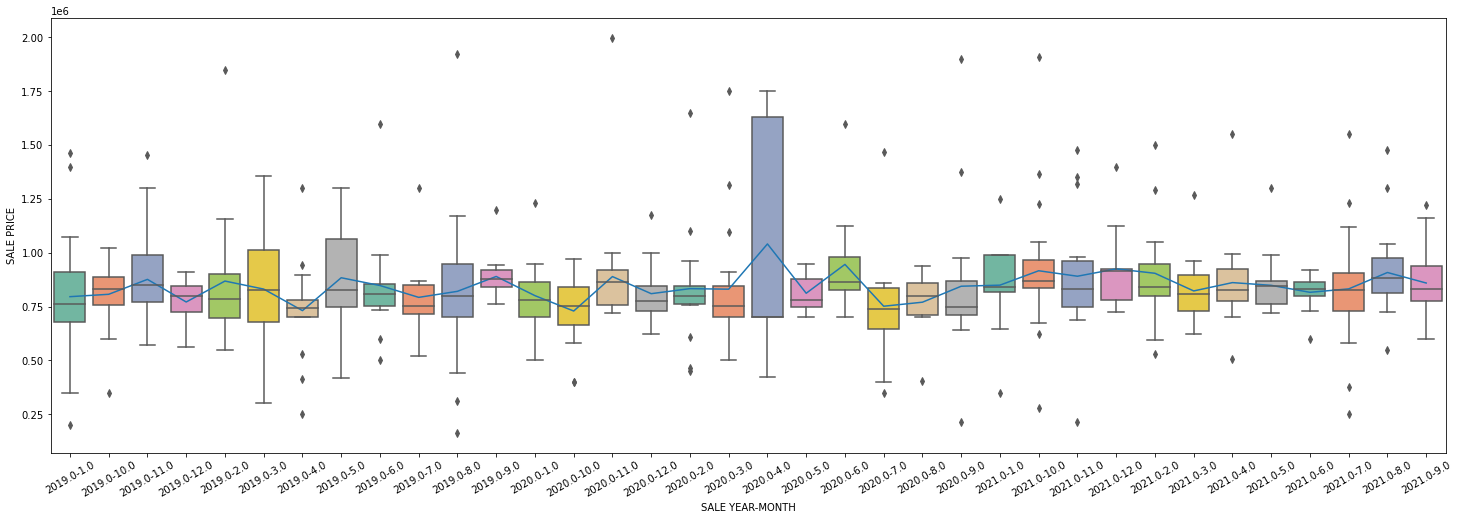

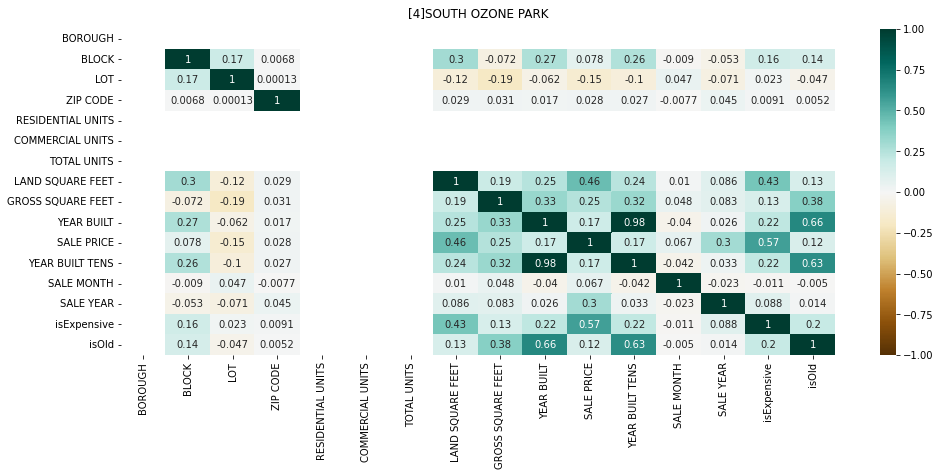

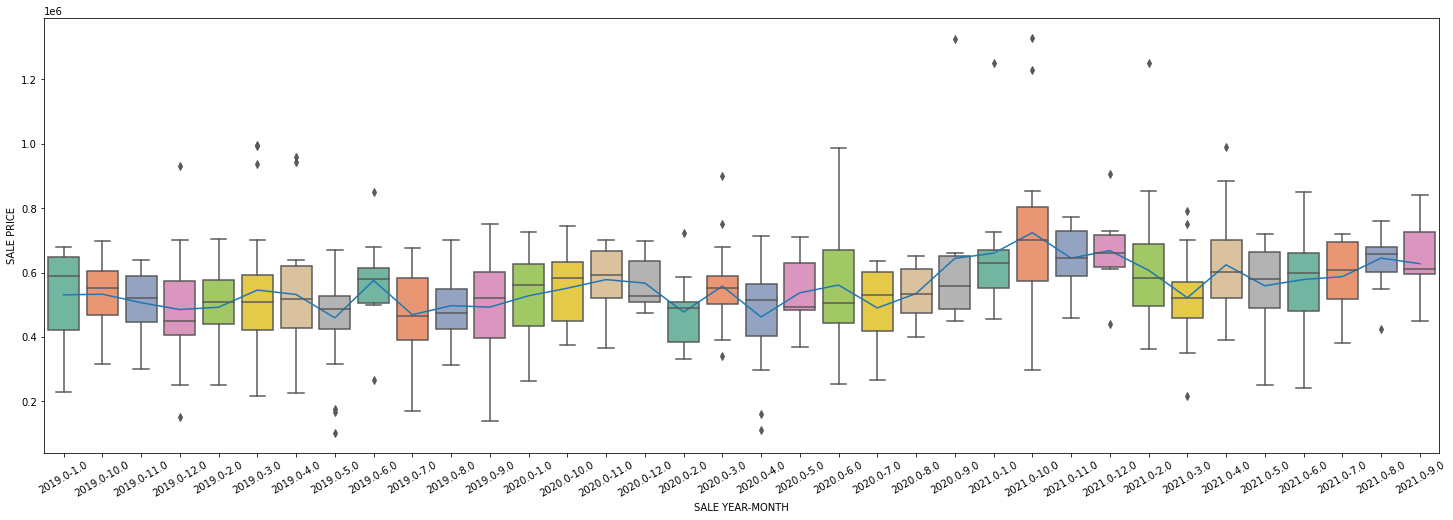

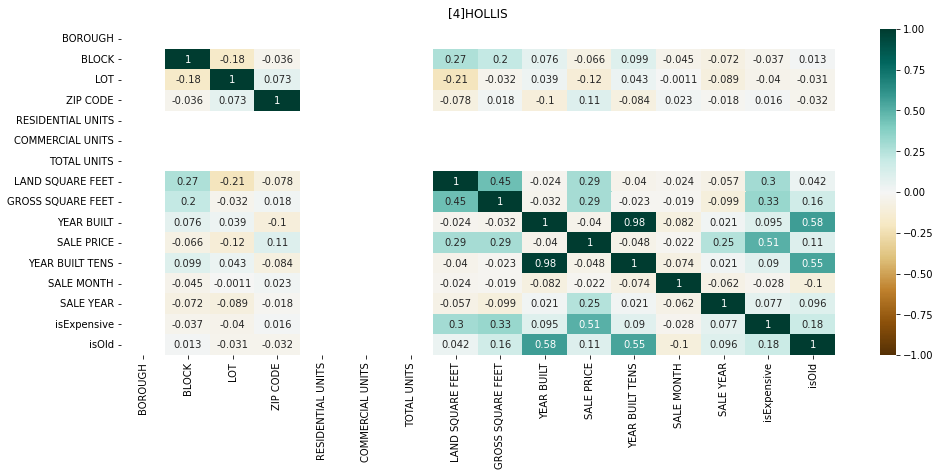

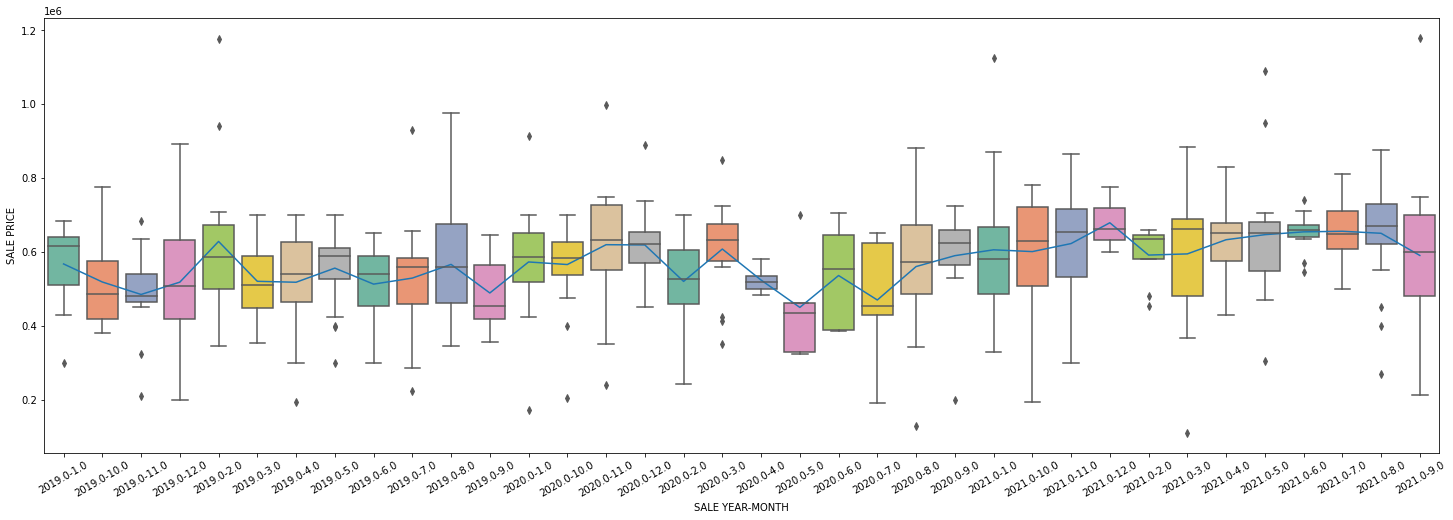

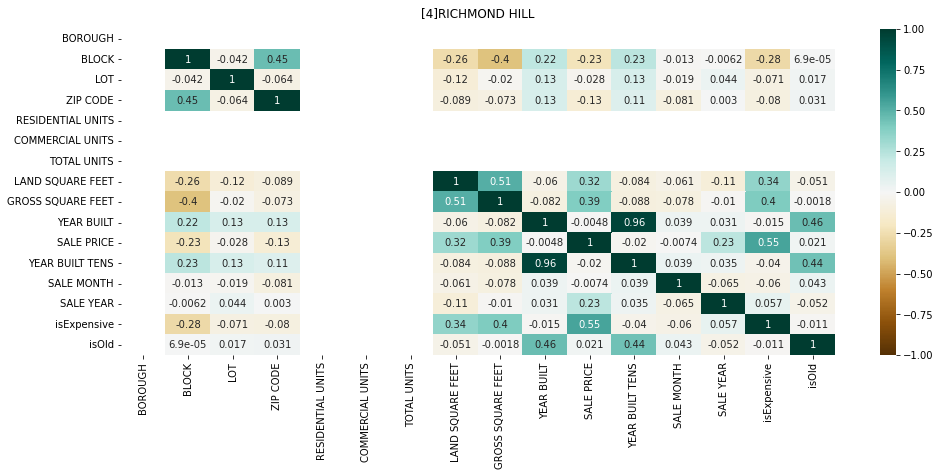

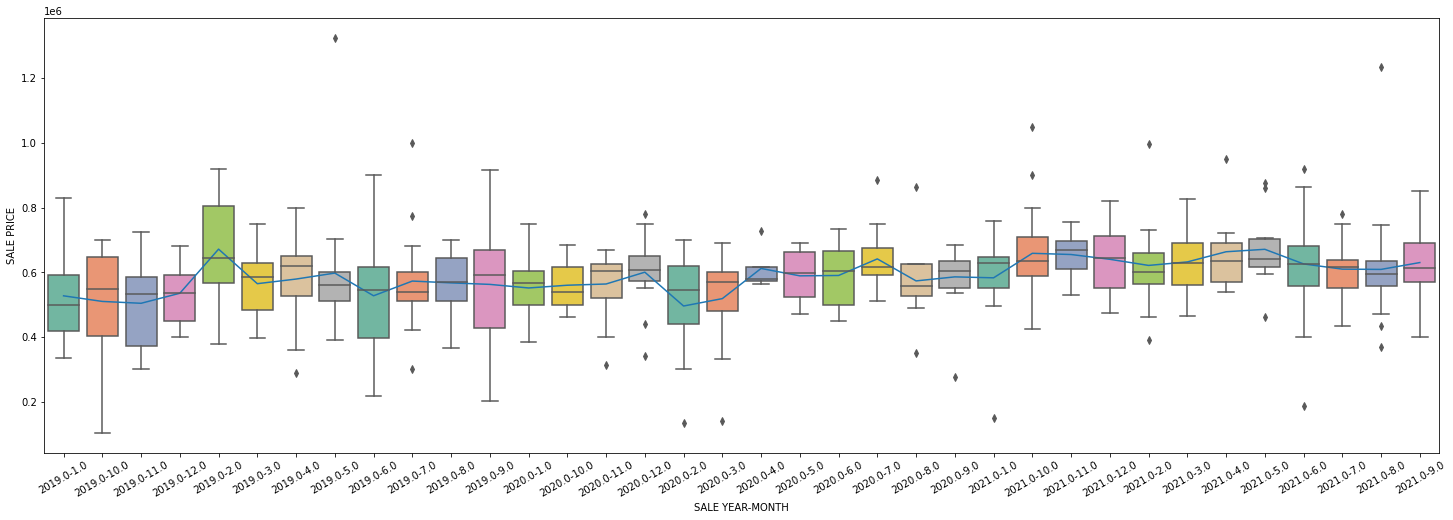

In [ ]:
borough = [1,2,4]

for b in borough:
  df_borough = df_target[df_target["BOROUGH"]==b]
  neighborhood = df_borough["NEIGHBORHOOD"].value_counts().head(10).index.tolist()
  for n in neighborhood:
    # Increase the size of the heatmap.
    df_neighborhood = df_borough[df_borough["NEIGHBORHOOD"]==n]

    plt.figure(figsize=(16, 6))

    # Store heatmap object in a variable to easily access it when you want to include more features (such as title).
    # Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
    heatmap = sns.heatmap(df_neighborhood.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

    # Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
    heatmap.set_title("["+str(b)+"]"+n, fontdict={'fontsize':12}, pad=12);
    #sns.boxplot(x='SALE YEAR-MONTH',y='SALE PRICE',data=df_target)
    plt.figure(figsize = (25,8))
    ax = sns.lineplot(x='SALE YEAR-MONTH',y='SALE PRICE',data=df_neighborhood.sort_values(by="SALE YEAR-MONTH"), ci=None, palette="Set2")
    ax = sns.boxplot(x='SALE YEAR-MONTH',y='SALE PRICE',data=df_neighborhood.sort_values(by="SALE YEAR-MONTH"), palette="Set2")
    ax.tick_params(axis='x', rotation=30)


    print("-----------------["+str(b)+"]"+n+"----------------")
    print(df_neighborhood["SALE PRICE"].describe())

    print("--------------------------------------")




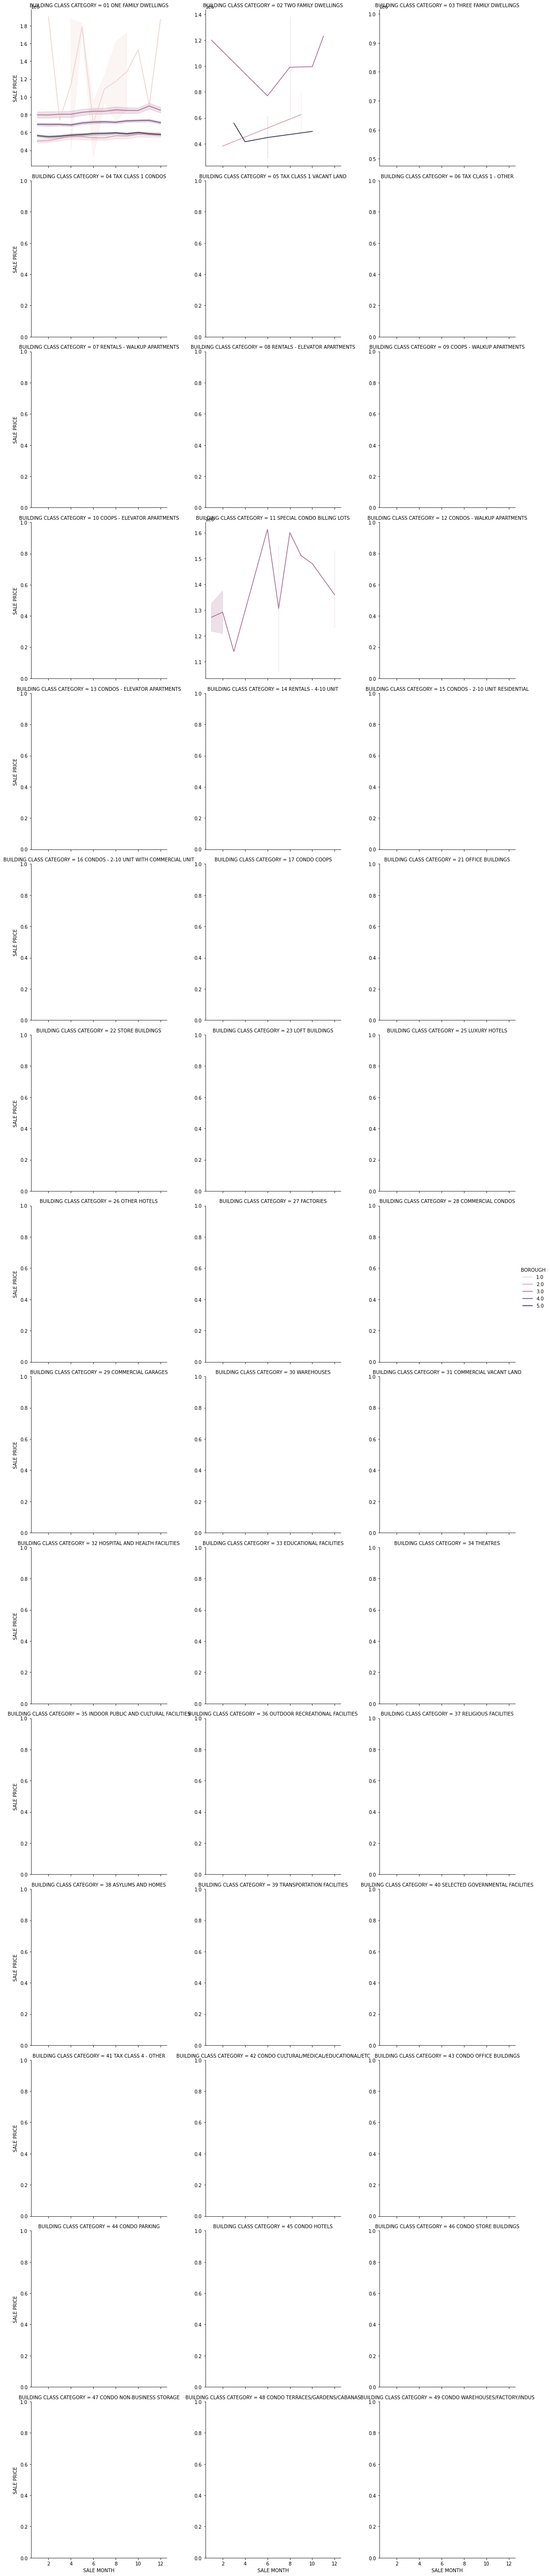

In [ ]:
sns.relplot(x="SALE MONTH", y="SALE PRICE", data=df_target, kind="line",hue="BOROUGH", col="BUILDING CLASS CATEGORY",col_wrap=3, facet_kws=dict(sharey=False))

#6.Modeling


###6.1 Simple Linear Model - Gross Square Feet vs Sale Price

In [ ]:
# Goal is to create a simple regression model.

In [ ]:
df_target.head(1).T

4821
BOROUGH                                                      1.0
NEIGHBORHOOD                              GREENWICH VILLAGE-WEST
BUILDING CLASS CATEGORY                  01 ONE FAMILY DWELLINGS
TAX CLASS AT PRESENT                                           1
BLOCK                                                      588.0
LOT                                                         82.0
BUILDING CLASS AT PRESENT                                     A1
ADDRESS                                       100 BEDFORD STREET
APARTMENT NUMBER                                             NaN
ZIP CODE                                                 10014.0
RESIDENTIAL UNITS                                            1.0
COMMERCIAL UNITS                                             0.0
TOTAL UNITS                                                  1.0
LAND SQUARE FEET                                           750.0
GROSS SQUARE FEET                                         1000.0
YEAR BUILT                                                1899.0
TAX CLASS AT TIME OF SALE                                    1.0
BUILDING CLASS AT TIME OF SALE                                A1
SALE PRICE                                             1751000.0
SALE DATE                                    2021-05-19 00:00:00
YEAR BUILT TENS                                           1890.0
SALE MONTH                                                   5.0
SALE YEAR                                                 2021.0
SALE YEAR-MONTH                                       2021.0-5.0
BUILDING CLASS AT TIME OF SALE CATEGORY                        A
isExpensive                                                  1.0
isOld                                                        0.0

In [ ]:
df_target.columns
for col in df_target.columns:
  print('--------------------------')
  print(col)
  print(df_target[col].value_counts().size)   
  print(df_target[col].value_counts().head(50))
  print('--------------------------')

--------------------------
BOROUGH
5
4.0    15669
5.0    10097
3.0     5387
2.0     2718
1.0       26
Name: BOROUGH, dtype: int64
--------------------------
--------------------------
NEIGHBORHOOD
209
FLUSHING-NORTH              1176
GREAT KILLS                 1173
ST. ALBANS                   864
BAYSIDE                      860
QUEENS VILLAGE               834
SO. JAMAICA-BAISLEY PARK     767
SPRINGFIELD GARDENS          643
ELTINGVILLE                  608
ARDEN HEIGHTS                603
FLUSHING-SOUTH               581
SOUTH OZONE PARK             550
HOLLIS                       512
FLATBUSH-EAST                496
RICHMOND HILL                488
MIDDLE VILLAGE               468
LAURELTON                    461
MARINE PARK                  450
SOUTH JAMAICA                438
MIDLAND BEACH                408
ROSEDALE                     405
HOWARD BEACH                 397
WHITESTONE                   376
OZONE PARK                   336
FOREST HILLS                 327
SOUTH B

[(0.0, 10000.0)]

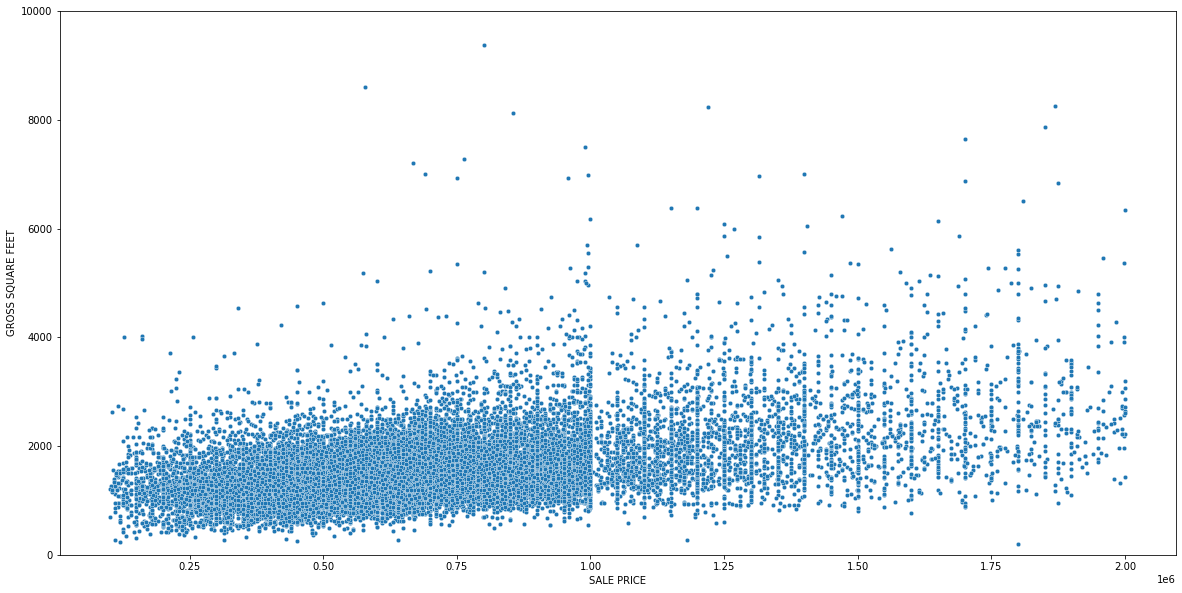

In [ ]:
df_linreg = df_target[['SALE PRICE','GROSS SQUARE FEET', 'YEAR BUILT', 'BOROUGH','NEIGHBORHOOD']]

plt.figure(figsize=(20,10))
ax = sns.scatterplot(data=df_linreg, x='SALE PRICE', y='GROSS SQUARE FEET', s=20)
ax.set(ylim=(0, 10000))

In [ ]:
df_linreg['SALE PRICE'].isna().sum()
df_linreg['GROSS SQUARE FEET'].isna().sum()

df_linreg = df_linreg[(df_linreg['GROSS SQUARE FEET'].notna())]
df_linreg = df_linreg[(df_linreg['GROSS SQUARE FEET']!=0)]

df_linreg['GROSS SQUARE FEET'].isna().sum()
df_linreg.shape

(33897, 5)

In [ ]:
lr = LinearRegression()

y = df_linreg['SALE PRICE'].values.reshape(-1,1)
X = df_linreg['GROSS SQUARE FEET'].values.reshape(-1,1)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Fit the model to the data
model = lr.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = lr.predict(X_test)

# Obtain the coefficient of determination by calling the model with the score() function, then print the coefficient:
print("R^2: {}".format(lr.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

# Print the Intercept:
print('intercept:', model.intercept_)

# Print the Slope:
print('slope:', model.coef_) 

R^2: 0.21418187209562722
Root Mean Squared Error: 262665.768761553
intercept: [311189.417128]
slope: [[244.16006364]]


#### 6.1.1 Linear Regression - Gross Sq Ft vs Sale Price per Borough




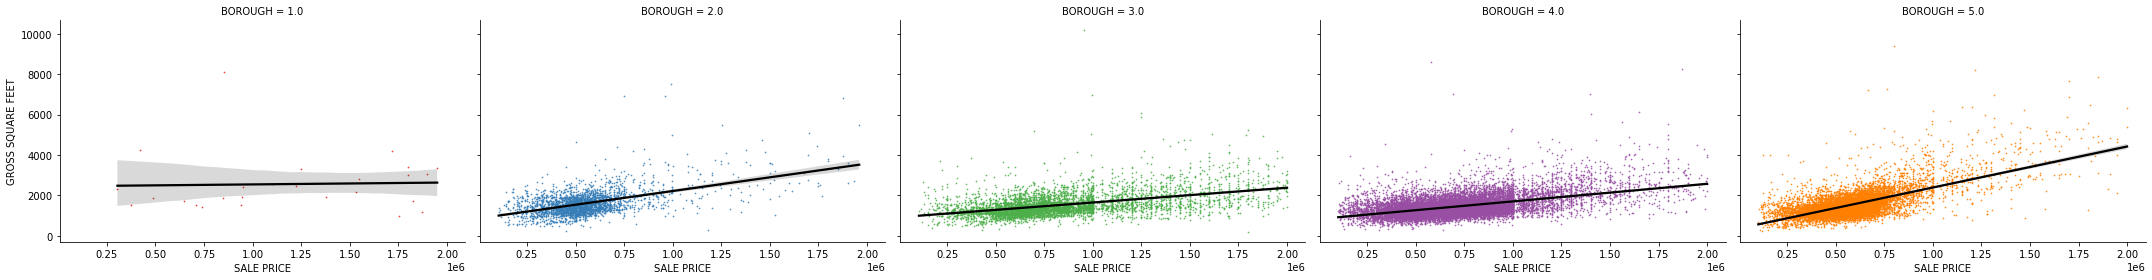

In [ ]:
sns.lmplot(x='SALE PRICE', 
           y='GROSS SQUARE FEET', 
           data=df_linreg, 
           scatter_kws={'s':0.5},
           line_kws={'color':'black'}, 
           palette="Set1",
           col='BOROUGH',
           hue='BOROUGH',
           col_wrap=5,
           height=4, aspect=1.5)

#### 6.1.3 Linear Regression - Gross Sq Ft vs Sale Price per Neighborhood




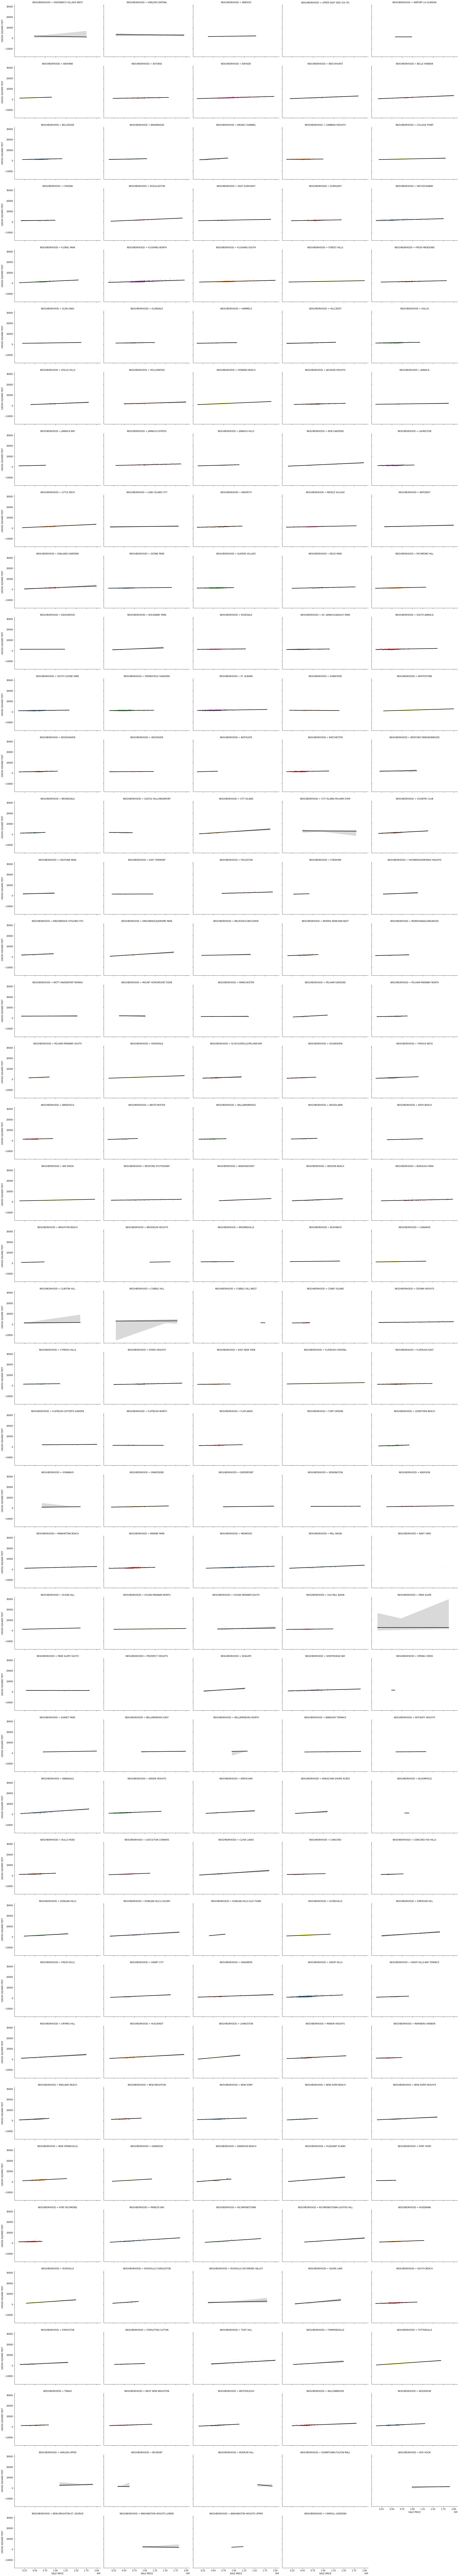

In [ ]:
sns.lmplot(x='SALE PRICE', 
           y='GROSS SQUARE FEET', 
           data=df_linreg, 
           scatter_kws={'s':0.5},
           line_kws={'color':'black'}, 
           palette="Set1",
           col='NEIGHBORHOOD',
           hue='NEIGHBORHOOD',
           col_wrap=5,
           height=4, aspect=1.5)

#### 6.1.3 Linear Regression - Year Built Sq Ft vs Sale Price per Neighborhood




In [ ]:
sns.lmplot(x='SALE PRICE', 
           y='YEAR BUILT', 
           data=df_linreg, 
           scatter_kws={'s':0.5},
           line_kws={'color':'black'}, 
           palette="Set1",
           col='BOROUGH',
           hue='BOROUGH',
           col_wrap=5,
           height=4, aspect=1.5)

## 6.2 Simple Logistic Regression Model

In [ ]:
# Let's create expensive vs not-expensive
# if price is bigger than 800000 is expensive else not expensive
df_target.loc[df_target["SALE PRICE"] >= 800000, 'isExpensive'] = 1  
df_target.loc[df_target["SALE PRICE"] < 800000, 'isExpensive'] = 0

# Let's create old vs new 1920 - 2020
# if the year built is lower than 1970 it is old, else it is not old
df_target.loc[df_target["YEAR BUILT"] <= 1970, 'isOld'] = 0  
df_target.loc[df_target["YEAR BUILT"] > 1970, 'isOld'] = 1


In [ ]:
df_target.head(1)

BOROUGH            NEIGHBORHOOD  ... isExpensive isOld
4821      1.0  GREENWICH VILLAGE-WEST  ...         1.0   0.0

[1 rows x 27 columns]

In [ ]:
df_target['isExpensive'].value_counts()

0.0    25110
1.0     8787
Name: isExpensive, dtype: int64

#### 6.2.1 Logistic Regression - Predict 'SALE PRICE' w/ 'Gross Sq Ft' 

In [ ]:
logreg = LogisticRegression()

X = df_target['GROSS SQUARE FEET'].values.reshape(-1,1)
y = df_target['isExpensive'].values.ravel()

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

# Fit the model to the data
model = logreg.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = logreg.predict(X_test)

# Print the accuracy from the testing data.
print(accuracy_score(y_pred, y_test))

0.7755752212389381


In [ ]:
def cv_score(clf, x, y, score_func=accuracy_score):
    result = 0
    nfold = 5
    for train, test in KFold(nfold).split(x): # split data into train/test groups, 5 times
        clf.fit(x[train], y[train]) # fit
        result += score_func(clf.predict(x[test]), y[test]) # evaluate score function on held-out data
    return result / nfold # average

In [ ]:
logreg = LogisticRegression()
score = cv_score(logreg, X_train, y_train)
print(score)

0.7775544848511574


#### 6.2.2 Logistic Regression - Predict 'SALE PRICE' w/ 'YEAR BUILT'

In [ ]:
logreg = LogisticRegression()

X = df_target['YEAR BUILT'].values.reshape(-1,1)
y = df_target['isExpensive'].values.ravel()

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

# Fit the model to the data
model = logreg.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = logreg.predict(X_test)

# Print the accuracy from the testing data.
print(accuracy_score(y_pred, y_test))

0.7393510324483776


In [ ]:
def cv_score(clf, x, y, score_func=accuracy_score):
    result = 0
    nfold = 5
    for train, test in KFold(nfold).split(x): # split data into train/test groups, 5 times
        clf.fit(x[train], y[train]) # fit
        result += score_func(clf.predict(x[test]), y[test]) # evaluate score function on held-out data
    return result / nfold # average

In [ ]:
logreg = LogisticRegression()
score = cv_score(logreg, X_train, y_train)
print(score)

0.7412471075895457


#### 6.2.3 Logistic Regression - Predict 'SALE PRICE' w/ 'GROSS SQ FT'&'YEAR BUILT'&'LAND SQUARE FEET'

In [ ]:
logreg = LogisticRegression()

X = df_target[['YEAR BUILT','GROSS SQUARE FEET','LAND SQUARE FEET']].values
y = df_target['isExpensive'].values.ravel()

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

# Fit the model to the data
model = logreg.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = logreg.predict(X_test)

# Print the accuracy from the testing data.
print(accuracy_score(y_pred, y_test))

0.7810029498525074


In [ ]:
def cv_score(clf, x, y, score_func=accuracy_score):
    result = 0
    nfold = 5
    for train, test in KFold(nfold).split(x): # split data into train/test groups, 5 times
        clf.fit(x[train], y[train]) # fit
        result += score_func(clf.predict(x[test]), y[test]) # evaluate score function on held-out data
    return result / nfold # average

In [ ]:
logreg = LogisticRegression()
score = cv_score(logreg, X_train, y_train)
print(score)

0.7839662403189833
